# Chapter 1: Data Cleaning and Modeling on Python

## Data Gathering

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Import and Display

In [2]:
#Importing and Displaying Data
headers = ["DateTime (dd/mm/yyyyy hh:mm:ss)", "Servo Lower Angle (°)","Servo Upper Angle (°)",
          "Roll Angle (°)", "Pitch Angle (°)", "Humidity (%)", "Temperature (°C)", "Heat Index (°C)",
          "Irradiance (W/m2)", "Voltage (V)", "Current (mA)"]
data = pd.read_csv("DATA 19_05_22.txt", header=None, index_col=False,
    names=headers, parse_dates= ["DateTime (dd/mm/yyyyy hh:mm:ss)"])
display(data.head())
print("Data Total Rows: {}\nData Total Columns: {}".format(data.shape[0], data.shape[1]))

,DateTime (dd/mm/yyyyy hh:mm:ss),Servo Lower Angle (°),Servo Upper Angle (°),Roll Angle (°),Pitch Angle (°),Humidity (%),Temperature (°C),Heat Index (°C),Irradiance (W/m2),Voltage (V),Current (mA)
0,2022-05-19 04:56:00,0,0,15.5504,-66.8076,93.0,27.2,32.2115,0.0,0.0,0.0
1,2022-05-19 04:56:05,0,23,18.0047,-47.4466,93.7,27.2,32.3448,0.0,0.0,0.0
2,2022-05-19 04:56:10,0,46,17.8869,-24.9693,93.8,27.2,32.3639,0.0,0.0,0.0
3,2022-05-19 04:56:15,0,69,20.1395,-6.8439,93.7,27.1,32.0455,0.0,0.0,0.0
4,2022-05-19 04:56:20,0,92,18.2653,16.4409,93.8,27.1,32.0641,0.0,0.0,0.0


Data Total Rows: 10246
Data Total Columns: 11


In [3]:
data.describe()

,DateTime (dd/mm/yyyyy hh:mm:ss),Servo Lower Angle (°),Servo Upper Angle (°),Roll Angle (°),Pitch Angle (°),Humidity (%),Temperature (°C),Heat Index (°C),Irradiance (W/m2),Voltage (V),Current (mA)
count,10246,10246.000000,10246.000000,10246.000000,10246.000000,10100.000000,10100.000000,10100.000000,10246.000000,10232.000000,10232.000000
mean,2022-05-19 12:02:53.806070784,89.705739,45.988776,2.932538,-27.246695,59.662436,38.137990,51.717315,102.487408,0.746244,21.123944
min,2022-05-19 04:56:00,0.000000,0.000000,-15.914300,-88.719000,28.800000,25.600000,27.135600,0.000000,0.000000,0.000000
25%,2022-05-19 08:29:26.249999872,45.000000,23.000000,-7.956250,-58.117750,38.800000,30.400000,37.445000,43.046750,0.260800,7.900000
50%,2022-05-19 12:02:52.500000,90.000000,46.000000,2.863500,-26.004200,57.600000,37.100000,48.983150,92.420450,0.746100,21.100000
75%,2022-05-19 15:36:19.750000128,135.000000,69.000000,14.529500,3.724350,75.100000,46.200000,67.536325,170.290550,1.271600,35.700000
max,2022-05-19 19:10:07,180.000000,92.000000,21.027800,27.078000,99.900000,56.100000,86.333200,239.984500,1.945300,53.200000
std,NaN,63.702569,32.527704,12.180201,33.273733,21.728205,8.727385,16.125929,70.963683,0.528144,14.575224


In [4]:
display(pd.DataFrame(data.isna().sum(), columns=["Total Nan Values"]).T)

,DateTime (dd/mm/yyyyy hh:mm:ss),Servo Lower Angle (°),Servo Upper Angle (°),Roll Angle (°),Pitch Angle (°),Humidity (%),Temperature (°C),Heat Index (°C),Irradiance (W/m2),Voltage (V),Current (mA)
Total Nan Values,0,0,0,0,0,146,146,146,0,14,14


~ The nan/missing values from the "Humidity", "Temperature", and "Heat Index" columns are caused by the low sampling rate capability of the sensor and the library used which is expected.

~ The nan/missing values from the "Voltage" and "Current" columns mostly occur when the sun is down or no current was produced from the solar panel, the developers of the product ensures that quality data is being recorded so a Nan value was used to record instead for this scenario.

## Data Cleaning

~ Imputation process for "Temperature", "Humidity", and "Heat Index" columns is to find the average of the nearest previous not-Nan value and nearest next not-Nan value since these values don't really much differ from each other within a minute of timeframe.

In [5]:
col_to_clean = ["Humidity (%)", "Temperature (°C)", "Heat Index (°C)"]
display(data[col_to_clean])

,Humidity (%),Temperature (°C),Heat Index (°C)
0,93.0,27.2,32.2115
1,93.7,27.2,32.3448
2,93.8,27.2,32.3639
3,93.7,27.1,32.0455
4,93.8,27.1,32.0641
...,...,...,...
10241,91.9,27.5,32.8921
10242,91.8,27.4,32.5728
10243,91.8,27.4,32.5728
10244,91.9,27.4,32.5927


In [6]:
#Find closest previous value that is not a Nan value relative to the row where a Nan value is to be imputed
def FindPreviousNotNan(current_row, pd_series): #
    i=current_row-1
    val = np.nan
    pd_series_min_pos = 0
    while i>=pd_series_min_pos:
        if np.isnan(pd_series.values[i]):
            i-=1
        else:
            val = pd_series.values[i]
            break
    return val    

#Find closest next value that is not a Nan value relative to the row where a Nan value is to be imputed
def FindNextNotNan(current_row, pd_series): 
    i=current_row+1
    val=np.nan
    pd_series_max_pos = len(pd_series)-1
    while i<=pd_series_max_pos:
        if np.isnan(pd_series.values[i]):
            i+=1
        else:
            val = pd_series.values[i]
            break
    return val     

In [7]:
#Impute rows where Nan values are found
#It will get the average of previous and next row values that are not Nan
#If all of the previous row values are Nan but next row value is not Nan then the value to be imputed is the next value, vice versa
def ImputeColumn(pd_dataframe, column):
    for i in range(len(pd_dataframe)):
        current_val = pd_dataframe[column].values[i]
        previous_val = 0
        next_val = 0
        if np.isnan(current_val):
            previous_val = FindNextNotNan(i,pd_dataframe[column])
            next_val = FindPreviousNotNan(i,pd_dataframe[column])
            if not np.isnan(previous_val) and not np.isnan(next_val):
                pd_dataframe[column].values[i] = np.mean([previous_val,next_val])
            elif np.isnan(previous_val) and np.isnan(next_val):
                pd_dataframe[column].values[i] = np.nan
            else:
                if np.isnan(previous_val):
                    pd_dataframe[column].values[i] = next_val
                else:
                    pd_dataframe[column].values[i] = previous_val

In [8]:
print("Sample Rows Before Data Imputation")
display(data.loc[139:141,col_to_clean])
display(data.loc[199:201,col_to_clean])

for col in col_to_clean:
    ImputeColumn(data, col)

display(pd.DataFrame(data.isna().sum(), columns=["Total Nan Values"]).T)
print("Sample Rows After Data Imputation")
display(data.loc[139:141,col_to_clean])
display(data.loc[199:201,col_to_clean])


Sample Rows Before Data Imputation


,Humidity (%),Temperature (°C),Heat Index (°C)
139,97.5,25.8,27.7138
140,NaN,NaN,NaN
141,97.6,25.8,27.7161


,Humidity (%),Temperature (°C),Heat Index (°C)
199,98.4,25.7,27.4298
200,NaN,NaN,NaN
201,98.5,25.7,27.4313


,DateTime (dd/mm/yyyyy hh:mm:ss),Servo Lower Angle (°),Servo Upper Angle (°),Roll Angle (°),Pitch Angle (°),Humidity (%),Temperature (°C),Heat Index (°C),Irradiance (W/m2),Voltage (V),Current (mA)
Total Nan Values,0,0,0,0,0,0,0,0,0,14,14


Sample Rows After Data Imputation


,Humidity (%),Temperature (°C),Heat Index (°C)
139,97.50,25.8,27.71380
140,97.55,25.8,27.71495
141,97.60,25.8,27.71610


,Humidity (%),Temperature (°C),Heat Index (°C)
199,98.40,25.7,27.42980
200,98.45,25.7,27.43055
201,98.50,25.7,27.43130


~ Imputation process for "Voltage" and "Current" columns is to find the average of the nearest previous not-Nan value and nearest next not-Nan value (just like the same with the "Humidity", "Temperature", and "Heat Index" columns)  since these values don't really much differ from when the sun is down and is more likely to be approximately equal to zero.

In [9]:
col_to_clean = ["Voltage (V)", "Current (mA)"]

print("Sample Rows Before Data Imputation")
display(data.loc[132:134,col_to_clean])
display(data.loc[9441:9445,col_to_clean])

for col in col_to_clean:
    ImputeColumn(data, col)

display(pd.DataFrame(data.isna().sum(), columns=["Total Nan Values"]).T)
print("Sample Rows After Data Imputation")
display(data.loc[132:134,col_to_clean])
display(data.loc[9441:9445,col_to_clean])

Sample Rows Before Data Imputation


,Voltage (V),Current (mA)
132,0.0,0.1
133,NaN,NaN
134,0.0,0.0


,Voltage (V),Current (mA)
9441,0.0,0.1
9442,NaN,NaN
9443,NaN,NaN
9444,NaN,NaN
9445,0.0,0.0


,DateTime (dd/mm/yyyyy hh:mm:ss),Servo Lower Angle (°),Servo Upper Angle (°),Roll Angle (°),Pitch Angle (°),Humidity (%),Temperature (°C),Heat Index (°C),Irradiance (W/m2),Voltage (V),Current (mA)
Total Nan Values,0,0,0,0,0,0,0,0,0,0,0


Sample Rows After Data Imputation


,Voltage (V),Current (mA)
132,0.0,0.10
133,0.0,0.05
134,0.0,0.00


,Voltage (V),Current (mA)
9441,0.0,0.1000
9442,0.0,0.0500
9443,0.0,0.0250
9444,0.0,0.0125
9445,0.0,0.0000


## Exploratory Data Analysis

In [10]:
data["Power (mW)"] = data["Voltage (V)"]*data["Current (mA)"]
display(data)

,DateTime (dd/mm/yyyyy hh:mm:ss),Servo Lower Angle (°),Servo Upper Angle (°),Roll Angle (°),Pitch Angle (°),Humidity (%),Temperature (°C),Heat Index (°C),Irradiance (W/m2),Voltage (V),Current (mA),Power (mW)
0,2022-05-19 04:56:00,0,0,15.5504,-66.8076,93.0,27.2,32.2115,0.0,0.0,0.0,0.0
1,2022-05-19 04:56:05,0,23,18.0047,-47.4466,93.7,27.2,32.3448,0.0,0.0,0.0,0.0
2,2022-05-19 04:56:10,0,46,17.8869,-24.9693,93.8,27.2,32.3639,0.0,0.0,0.0,0.0
3,2022-05-19 04:56:15,0,69,20.1395,-6.8439,93.7,27.1,32.0455,0.0,0.0,0.0,0.0
4,2022-05-19 04:56:20,0,92,18.2653,16.4409,93.8,27.1,32.0641,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10241,2022-05-19 19:09:47,0,92,20.5672,24.4719,91.9,27.5,32.8921,0.0,0.0,0.0,0.0
10242,2022-05-19 19:09:52,45,0,12.3812,-74.3377,91.8,27.4,32.5728,0.0,0.0,0.0,0.0
10243,2022-05-19 19:09:57,45,23,11.3962,-51.3019,91.8,27.4,32.5728,0.0,0.0,0.0,0.0
10244,2022-05-19 19:10:02,45,46,14.6790,-24.8913,91.9,27.4,32.5927,0.0,0.0,0.0,0.0


In [11]:
power_pd = pd.pivot_table(data, values = "Power (mW)", index="Servo Lower Angle (°)", columns="Servo Upper Angle (°)", aggfunc=np.mean)
display(power_pd.style.set_caption("Average Power (mW) Delivered based on Servo Angle Positions"))

Servo Upper Angle (°),0,23,46,69,92
Servo Lower Angle (°),,,,,
0,18.339827,25.189814,27.510043,26.540156,22.891166
45,19.411268,25.378231,27.935678,26.228431,21.922363
90,18.139075,24.721523,27.536104,26.373132,22.013466
135,14.883955,23.227739,27.063587,27.014111,23.741312
180,10.729783,19.683897,25.531714,27.449549,26.176851


In [12]:
row,col = np.where(power_pd.values==power_pd.values.max())
print("According to data gathered (on the basis of maximum average power delivered),\nthe solar panel holder can be designed on these following servo angles:\n")
print("Servo Lower Angle: {}°".format(power_pd.index[row[0]]))
print("Servo Upper Angle: {}°".format(power_pd.columns[col[0]]))
print("Max Average Power: {:.4f}mW".format(power_pd.values.max()))

row,col = np.where(power_pd.values==power_pd.values.min())
print("\n\nMeanwhile the sets of Servo Angle that delivers the lowest average power:\n")
print("Servo Lower Angle: {}°".format(power_pd.index[row[0]]))
print("Servo Upper Angle: {}°".format(power_pd.columns[col[0]]))
print("Min Average Power: {:.4f}mW".format(power_pd.values.min()))

According to data gathered (on the basis of maximum average power delivered),
the solar panel holder can be designed on these following servo angles:

Servo Lower Angle: 45°
Servo Upper Angle: 46°
Max Average Power: 27.9357mW


Meanwhile the sets of Servo Angle that delivers the lowest average power:

Servo Lower Angle: 180°
Servo Upper Angle: 0°
Min Average Power: 10.7298mW


In [13]:
#To see what are the corresponding Pitch and Roll angles of each sets/pair of servo angles we average the gathered data
# This can be used as the basis to design the inclination of the solar panel holders, but during installment phase, the installers
# must also take into consideration the inclincation of the base/roof/ground where the solar panels will be installed.
pitch_roll_pd = pd.pivot_table(data, values =["Roll Angle (°)", "Pitch Angle (°)"], index="Servo Lower Angle (°)", columns="Servo Upper Angle (°)", aggfunc=np.mean)
pitch_roll_pd.style.set_caption("Average Roll and Pitch Angles based on Servo Angle Positions")

In [14]:
print("Pitch Angle: {:.4f}°".format(pitch_roll_pd['Pitch Angle (°)'][46][45])) #Type of Angle, Serov Upper Angle, Servo Lower Angle
print("Roll Angle: {:.4f}°".format(pitch_roll_pd['Roll Angle (°)'][46][45])) #Type of Angle, Serov Upper Angle, Servo Lower Angle

Pitch Angle: -27.7554°
Roll Angle: 13.8526°


In [15]:
#Now lets look if the servo angles which delivered the max average power will also have the max average irradiance
irradiance_pd = pd.pivot_table(data, values = "Irradiance (W/m2)", index="Servo Lower Angle (°)", columns="Servo Upper Angle (°)", aggfunc=np.mean)
irradiance_pd.style.set_caption("Average Irradiance (W/m2) based on Servo Angle Positions")

Servo Upper Angle (°),0,23,46,69,92
Servo Lower Angle (°),,,,,
0,87.708637,105.832895,113.995901,112.480507,102.923733
45,90.463229,106.511786,114.941417,111.826011,99.273751
90,86.736455,104.551842,114.279525,112.167286,99.517700
135,78.990350,99.784179,112.267149,112.665229,103.919787
180,69.733758,91.900020,108.132492,112.527074,108.892678


In [16]:
row,col = np.where(irradiance_pd.values==irradiance_pd.values.max())
print("According to data gathered (on the basis of maximum average irradiance),\nthe solar panel holder can be designed on these following servo angles:\n")
print("Servo Lower Angle: {}°".format(irradiance_pd.index[row[0]]))
print("Servo Upper Angle: {}°".format(irradiance_pd.columns[col[0]]))
print("Max Irradiance: {:.4f}W/m2".format(irradiance_pd.values.max()))

row,col = np.where(irradiance_pd.values==irradiance_pd.values.min())
print("\n\nMeanwhile the sets of Servo Angle that has the lowest average irradiance:\n")
print("Servo Lower Angle: {}°".format(irradiance_pd.index[row[0]]))
print("Servo Upper Angle: {}°".format(irradiance_pd.columns[col[0]]))
print("Min Irradiance: {:.4f}W/m2".format(irradiance_pd.values.min()))

According to data gathered (on the basis of maximum average irradiance),
the solar panel holder can be designed on these following servo angles:

Servo Lower Angle: 45°
Servo Upper Angle: 46°
Max Irradiance: 114.9414W/m2


Meanwhile the sets of Servo Angle that has the lowest average irradiance:

Servo Lower Angle: 180°
Servo Upper Angle: 0°
Min Irradiance: 69.7338W/m2


In [17]:
#Let's visualize the power delivered all throughout the day by the module through moving average for a better visualization
data_power_roll = data[["DateTime (dd/mm/yyyyy hh:mm:ss)","Power (mW)"]].copy()
data_power_roll["Power (mW) Roll Ave 25"] = data["Power (mW)"].rolling(25).mean()
data_power_roll["Power (mW) Roll Ave 500"] = data["Power (mW)"].rolling(500).mean()
data_power_roll["Power (mW) Roll Ave 1000"] = data["Power (mW)"].rolling(1000).mean()
data_power_roll.rename(columns={"DateTime (dd/mm/yyyyy hh:mm:ss)":"DateTime"}, inplace=True)
data_power_roll.set_index("DateTime", inplace=True)
display(data_power_roll.head())

,Power (mW),Power (mW) Roll Ave 25,Power (mW) Roll Ave 500,Power (mW) Roll Ave 1000
DateTime,,,,
2022-05-19 04:56:00,0.0,NaN,NaN,NaN
2022-05-19 04:56:05,0.0,NaN,NaN,NaN
2022-05-19 04:56:10,0.0,NaN,NaN,NaN
2022-05-19 04:56:15,0.0,NaN,NaN,NaN
2022-05-19 04:56:20,0.0,NaN,NaN,NaN


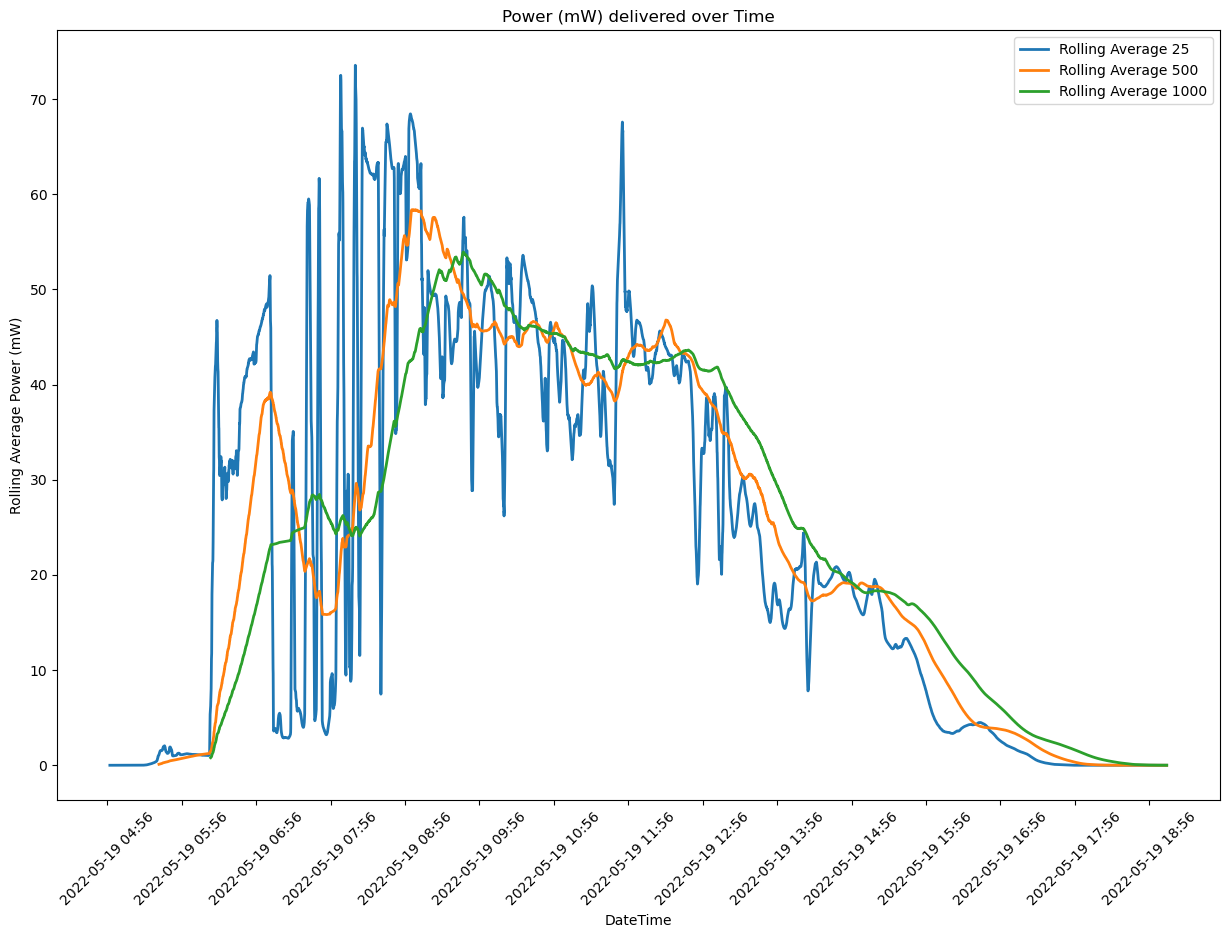

In [18]:
plt.figure(figsize=(15,10))
x_ticks = pd.date_range(start=data_power_roll.index.min(), end=data_power_roll.index.max(), freq="H")
plt.xticks(x_ticks, x_ticks.strftime("%Y-%m-%d %H:%M"), rotation=45, ha="center")

plt.plot(data_power_roll["Power (mW) Roll Ave 25"], linewidth=2, label="Rolling Average 25")
plt.plot(data_power_roll["Power (mW) Roll Ave 500"], linewidth=2, label="Rolling Average 500")
plt.plot(data_power_roll["Power (mW) Roll Ave 1000"], linewidth=2, label="Rolling Average 1000")
plt.title("Power (mW) delivered over Time")
plt.xlabel("DateTime")
plt.ylabel("Rolling Average Power (mW)")
plt.legend(loc="best")
plt.show()

The fluctuation of data in the line plot of "Rolling Ave 25" higlights how different servo positions will deliver different amounts of power and the fluctuation is also caused by partial shading of the clouds. To visualize this properly, let's create a graph of different pairs of servo position (both from Lower and Upper).

In [19]:
col_to_use = ["DateTime (dd/mm/yyyyy hh:mm:ss)", "Servo Lower Angle (°)","Servo Upper Angle (°)","Irradiance (W/m2)","Power (mW)"]
servo_pair_all_list = list()
servo_lower = data["Servo Lower Angle (°)"].unique()
servo_upper = data["Servo Upper Angle (°)"].unique()
print("Servo Lower Angles: ", servo_lower)
print("Servo Upper Angles: ", servo_upper)

for servo_lower_angle in servo_lower:
    servo_pairings = list()
    for servo_upper_angle in servo_upper:
        servo_pair_filtered = data[(data["Servo Lower Angle (°)"]==servo_lower_angle) & (data["Servo Upper Angle (°)"]==servo_upper_angle)][col_to_use]
        servo_pair_filtered.rename(columns={"DateTime (dd/mm/yyyyy hh:mm:ss)":"DateTime"}, inplace=True)
        servo_pair_filtered.set_index("DateTime", inplace=True)
        servo_pairings.append(servo_pair_filtered)
    servo_pair_all_list.append(servo_pairings)
    
display(servo_pair_all_list[0][0].head(5)) # Servo Lower: 0°, Servo Upper 0°
display(servo_pair_all_list[2][3].head(5)) # Servo Lower: 90°, Servo Upper 69°

Servo Lower Angles:  [  0  45  90 135 180]
Servo Upper Angles:  [ 0 23 46 69 92]


,Servo Lower Angle (°),Servo Upper Angle (°),Irradiance (W/m2),Power (mW)
DateTime,,,,
2022-05-19 04:56:00,0,0,0.0,0.0
2022-05-19 04:58:05,0,0,0.0,0.0
2022-05-19 05:00:10,0,0,0.0,0.0
2022-05-19 05:02:15,0,0,0.0,0.0
2022-05-19 05:04:20,0,0,0.0,0.0


,Servo Lower Angle (°),Servo Upper Angle (°),Irradiance (W/m2),Power (mW)
DateTime,,,,
2022-05-19 04:57:05,90,69,0.000,0.0
2022-05-19 04:59:10,90,69,0.000,-0.0
2022-05-19 05:01:15,90,69,0.000,-0.0
2022-05-19 05:03:20,90,69,0.000,0.0
2022-05-19 05:05:25,90,69,0.233,0.0


-- Graphing Rolling Average of Power (mW) of Different Servo Angle Pairs --

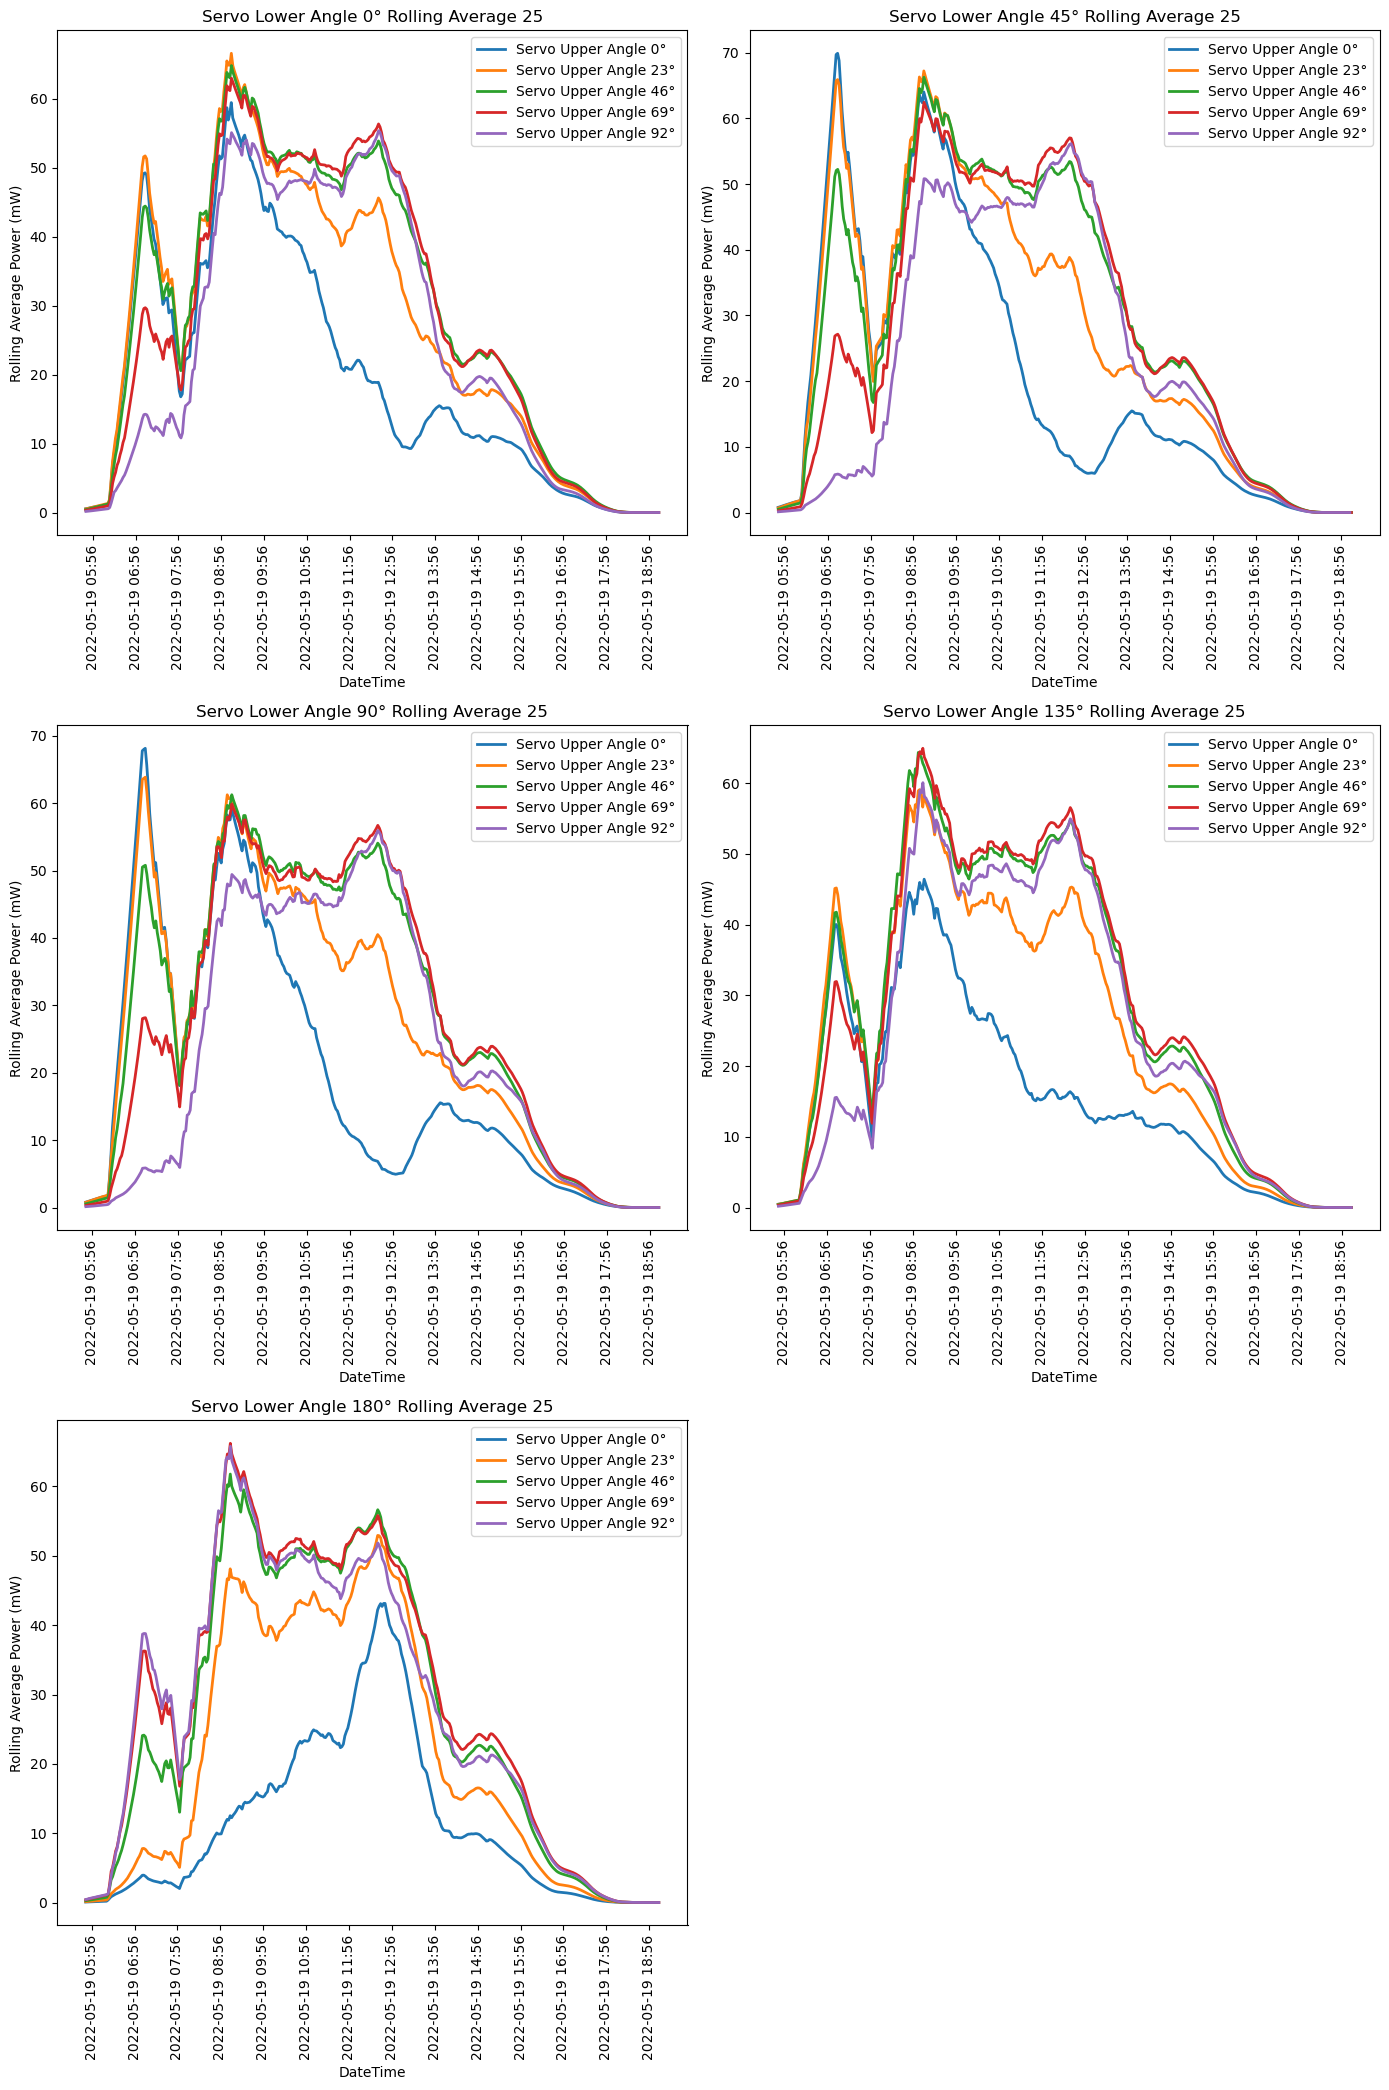

In [20]:
fig = plt.figure(figsize=(14, 21))
for i in range(len(servo_pair_all_list)):
    ax = fig.add_subplot(3,2,i+1)
    ax.set_title("Servo Lower Angle {}° Rolling Average 25".format(servo_lower[i]))
    ax.set_xlabel("DateTime")
    ax.set_ylabel("Rolling Average Power (mW)")
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks.strftime("%Y-%m-%d %H:%M"))
    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
    for j in range(len(servo_pair_all_list[i])):
        ax.plot(servo_pair_all_list[i][j]["Power (mW)"].rolling(25).mean(), linewidth=2, label="Servo Upper Angle {}°".format(servo_upper[j]))
    ax.legend(loc="best")
fig.tight_layout()
plt.show()

-- Graphing Rolling Average of Irradiance (W/m2) of Different Servo Angle Pairs --

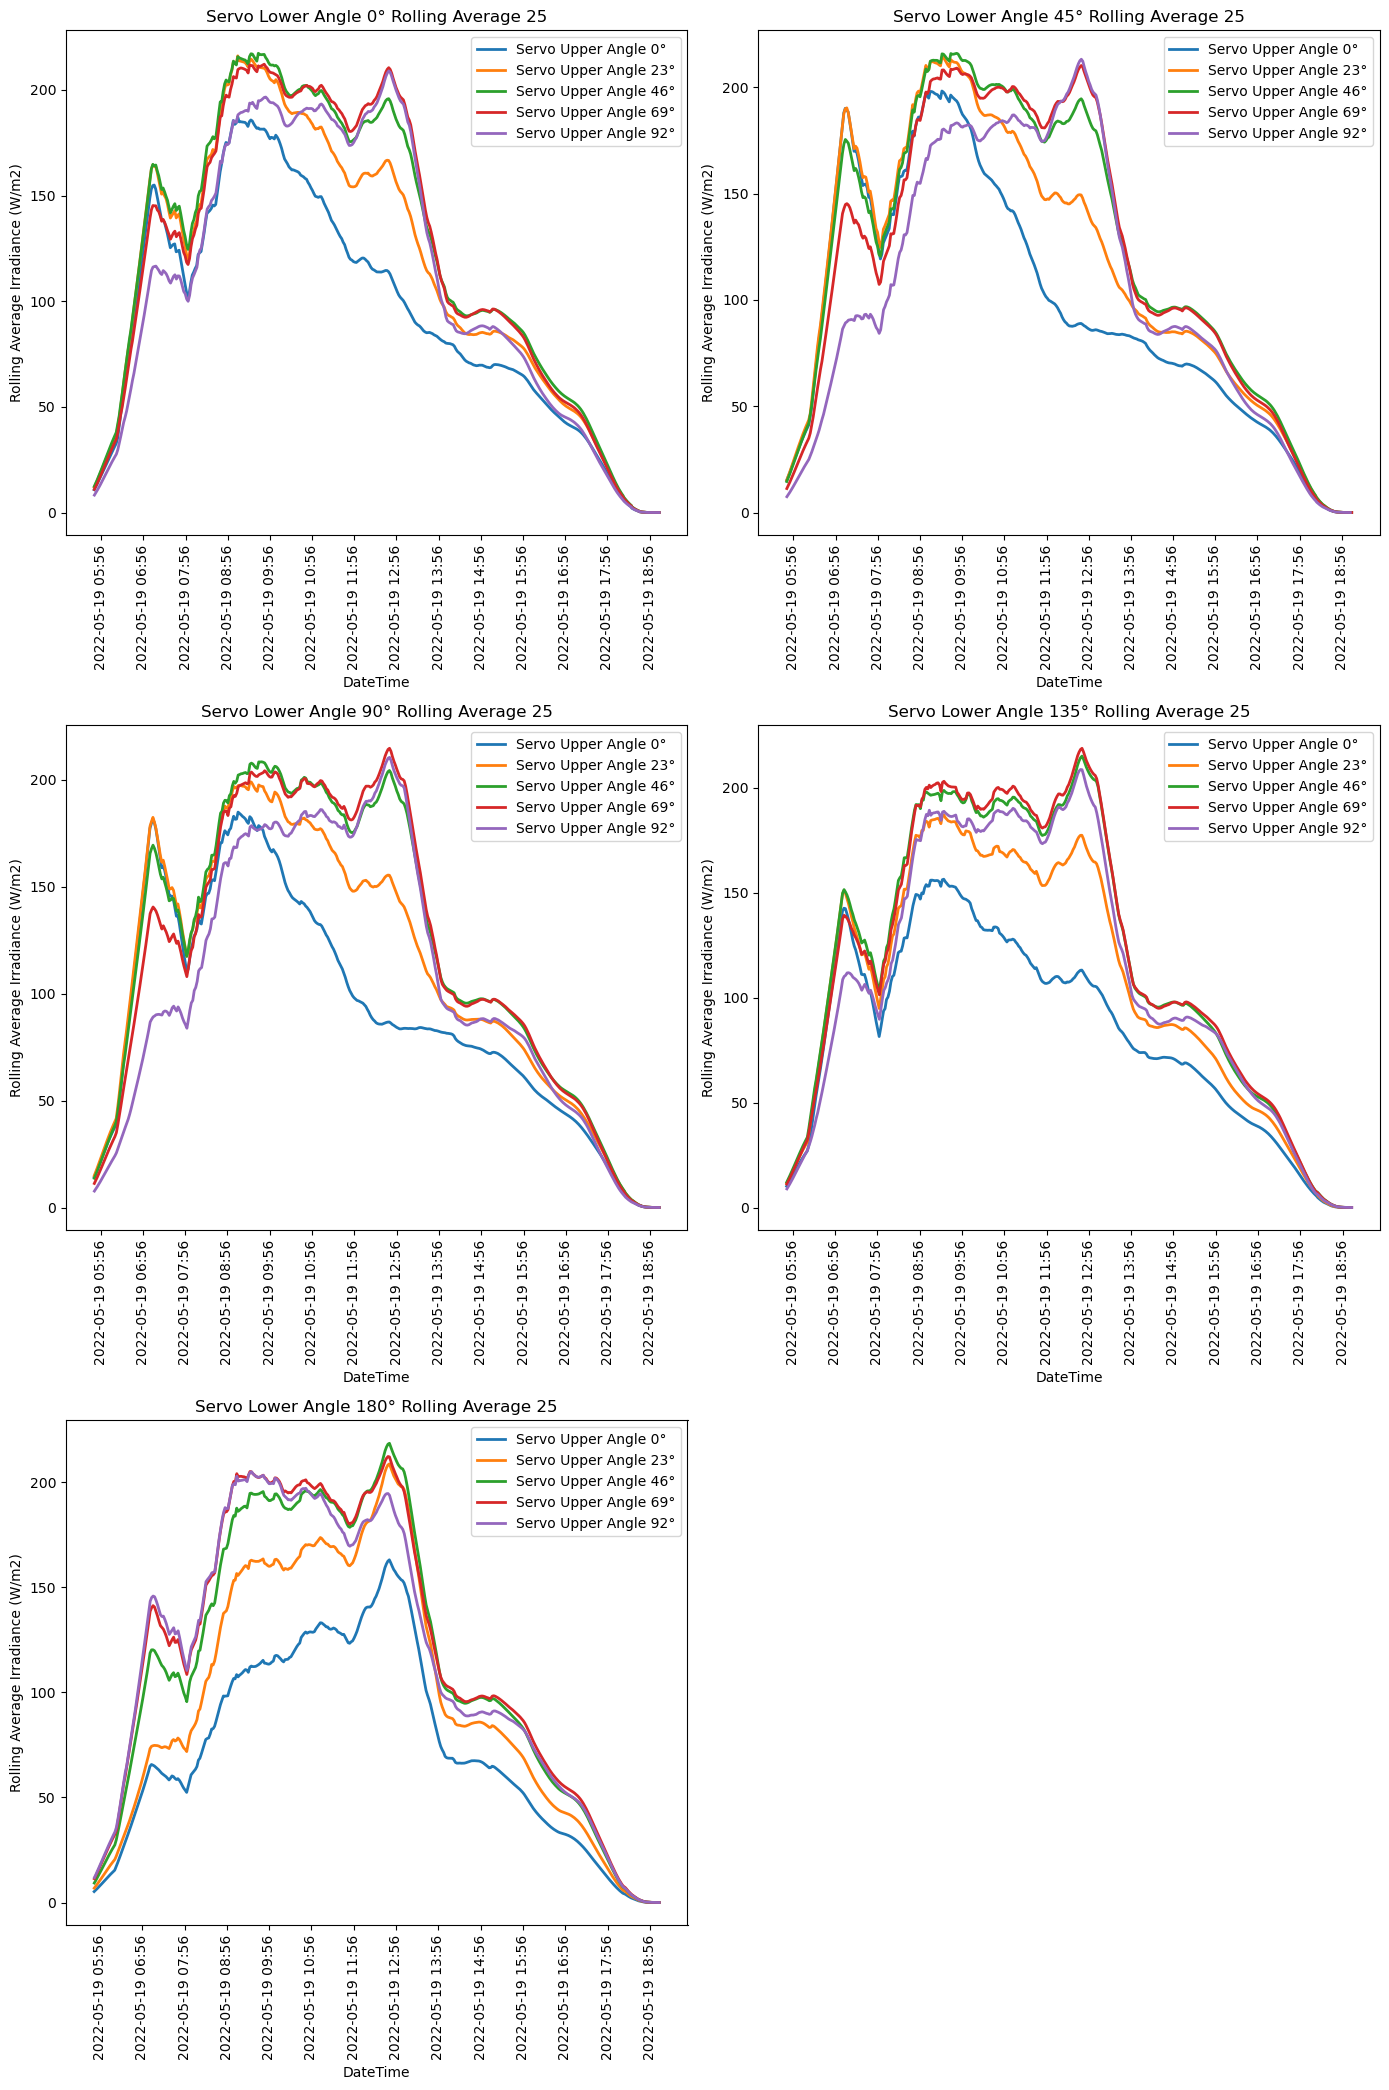

In [21]:
fig = plt.figure(figsize=(14, 21))
for i in range(len(servo_pair_all_list)):
    ax = fig.add_subplot(3,2,i+1)
    ax.set_title("Servo Lower Angle {}° Rolling Average 25".format(servo_lower[i]))
    ax.set_xlabel("DateTime")
    ax.set_ylabel("Rolling Average Irradiance (W/m2)")
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_ticks.strftime("%Y-%m-%d %H:%M"))
    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
    for j in range(len(servo_pair_all_list[i])):
        ax.plot(servo_pair_all_list[i][j]["Irradiance (W/m2)"].rolling(25).mean(), linewidth=2, label="Servo Upper Angle {}°".format(servo_upper[j]))
    ax.legend(loc="best")
fig.tight_layout()
plt.show()

## Model Development

In [22]:
from sklearn.model_selection import train_test_split

columns_rename=["DateTime","Hour","Minute","Second","Servo Lower","Servo Upper", "Power (mW)"]
data_to_model =pd.concat([data["DateTime (dd/mm/yyyyy hh:mm:ss)"],
                        data["DateTime (dd/mm/yyyyy hh:mm:ss)"].dt.hour,
                        data["DateTime (dd/mm/yyyyy hh:mm:ss)"].dt.minute,
                        data["DateTime (dd/mm/yyyyy hh:mm:ss)"].dt.second,
                        data.iloc[:,1:3],data["Power (mW)"]], axis=1)
data_to_model.columns = columns_rename
data_to_model.set_index("DateTime", inplace=True)
display(data_to_model.iloc[:,:-1].head().style.set_caption("Predictor Variables to Use"))

x_ticks = pd.date_range(start=data_to_model.index.min(), end=data_to_model.index.max(), freq="H")
X_trainval, X_test, y_trainval, y_test = train_test_split(data_to_model.iloc[:,:-1], data_to_model["Power (mW)"], random_state=47)

,Hour,Minute,Second,Servo Lower,Servo Upper
DateTime,,,,,
2022-05-19 04:56:00,4,56,0,0,0
2022-05-19 04:56:05,4,56,5,0,23
2022-05-19 04:56:10,4,56,10,0,46
2022-05-19 04:56:15,4,56,15,0,69
2022-05-19 04:56:20,4,56,20,0,92


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

def grid_search_report(regressor, param_grid, X_trainval, X_test, y_trainval, y_test, x_ticks,
                       refit="r2", scoring=["r2","neg_mean_absolute_error"], cv=5):
                        #setting default values
    
    grid = GridSearchCV(regressor, param_grid=param_grid, scoring=scoring, refit=refit, cv=cv)
    grid.fit(X_trainval, y_trainval)
    print("Regression Model used: {}".format(regressor.__class__.__name__ ))
    print("Grid Search Scorer/s used: {}".format(scoring))
    print("Grid Search Scorer used to find best parameters: {}".format(refit))
    print("Best parameters: ", grid.best_params_)
    print("Best cross-validation score ({}): {:.4f}\n...".format(refit,grid.best_score_))

    #Predict both X_trainval and X_test for scoring and plotting
    y_trainval_pred=grid.predict(X_trainval)
    y_test_pred=grid.predict(X_test)
    
    #Print Metrics
    print("R2 Score:")
    print("Train-Validation Set: {:.4f}".format(grid.score(X_trainval, y_trainval)))
    print("Test Set: {:.4f}".format(grid.score(X_test, y_test)))
    print("Mean Absolute Error:")
    print("Train-Validation Set: {:.4f}mW".format(mean_absolute_error(y_trainval, y_trainval_pred)))
    print("Test Set: {:.4f}mW".format(mean_absolute_error(y_test, y_test_pred)))
        
    #Create dataframe with columns y_trainval_actual and y_trainval_predict with index 
        #from X_trainval.index which is the corresponding DateTime
    y_trainval_actual_pred = pd.DataFrame({"Power (mW) Actual":y_trainval.values, "Power (mW) Predict":y_trainval_pred}).set_index(X_trainval.index)
    #Create dataframe with columns y_test_actual and y_test_predict with index 
        #from X_test.index which is the corresponding DateTime
    y_test_actual_pred = pd.DataFrame({"Power (mW) Actual":y_test.values, "Power (mW) Predict":y_test_pred}).set_index(X_test.index)
    
    #Display DataFrame both from TrainVal set and Test set
    display(y_trainval_actual_pred.head().style.set_caption("TrainValidation Set: Actual vs. Predicted Power (mW)"))
    display(y_test_actual_pred.head().style.set_caption("Test Set: Actual vs. Predicted Predicted Power (mW)"))
    
    #Plot both TrainValidation and Test Set: Actual vs. Predicted
    fig = plt.figure(figsize=(14,7))
    for (subplot, y_set) in zip([1,2],[y_trainval_actual_pred,y_test_actual_pred]):
        ax = fig.add_subplot(1,2,subplot)
        if subplot==1 :
            ax.set_title("TrainValidation Set: Actual vs. Predicted (Rolling Average Power (mW))")
        elif subplot == 2:
            ax.set_title("Test Set: Actual vs. Predicted (Rolling Average Power (mW))")
        ax.set_xlabel("DateTime")
        ax.set_ylabel("Rolling Average Power (mW)")
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_ticks.strftime("%Y-%m-%d %H:%M"))
        plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
        #Plot Actual
        ax.plot(y_set.loc[:,"Power (mW) Actual"].sort_index().rolling(25).mean(), linewidth=2, label="Power (mW) Actual")
        #Plot Predicted
        ax.plot(y_set.loc[:,"Power (mW) Predict"].sort_index().rolling(25).mean(), linewidth=2, label="Power (mW) Predict")
        ax.legend(loc="best")
    fig.tight_layout()
    plt.show()
    
    return (grid.best_estimator_, grid.cv_results_) #return best estimator and cv results

Regression Model used: RandomForestRegressor
Grid Search Scorer/s used: ['r2', 'neg_mean_absolute_error']
Grid Search Scorer used to find best parameters: r2
Best parameters:  {'criterion': 'squared_error', 'max_depth': None, 'n_estimators': 500}
Best cross-validation score (r2): 0.9340
...
R2 Score:
Train-Validation Set: 0.9920
Test Set: 0.9384
Mean Absolute Error:
Train-Validation Set: 0.8432mW
Test Set: 2.3082mW


,Power (mW) Actual,Power (mW) Predict
DateTime,,
2022-05-19 05:16:30,0.000050,0.000080
2022-05-19 08:30:50,60.797730,63.327226
2022-05-19 18:54:04,0.000000,0.000000
2022-05-19 06:54:15,19.418050,19.405335
2022-05-19 16:06:51,3.403700,3.257295


,Power (mW) Actual,Power (mW) Predict
DateTime,,
2022-05-19 14:21:46,13.092480,11.600516
2022-05-19 08:23:10,72.742500,65.504031
2022-05-19 18:33:27,0.000000,0.000000
2022-05-19 16:09:31,4.313120,4.238830
2022-05-19 17:14:26,1.174860,1.192806


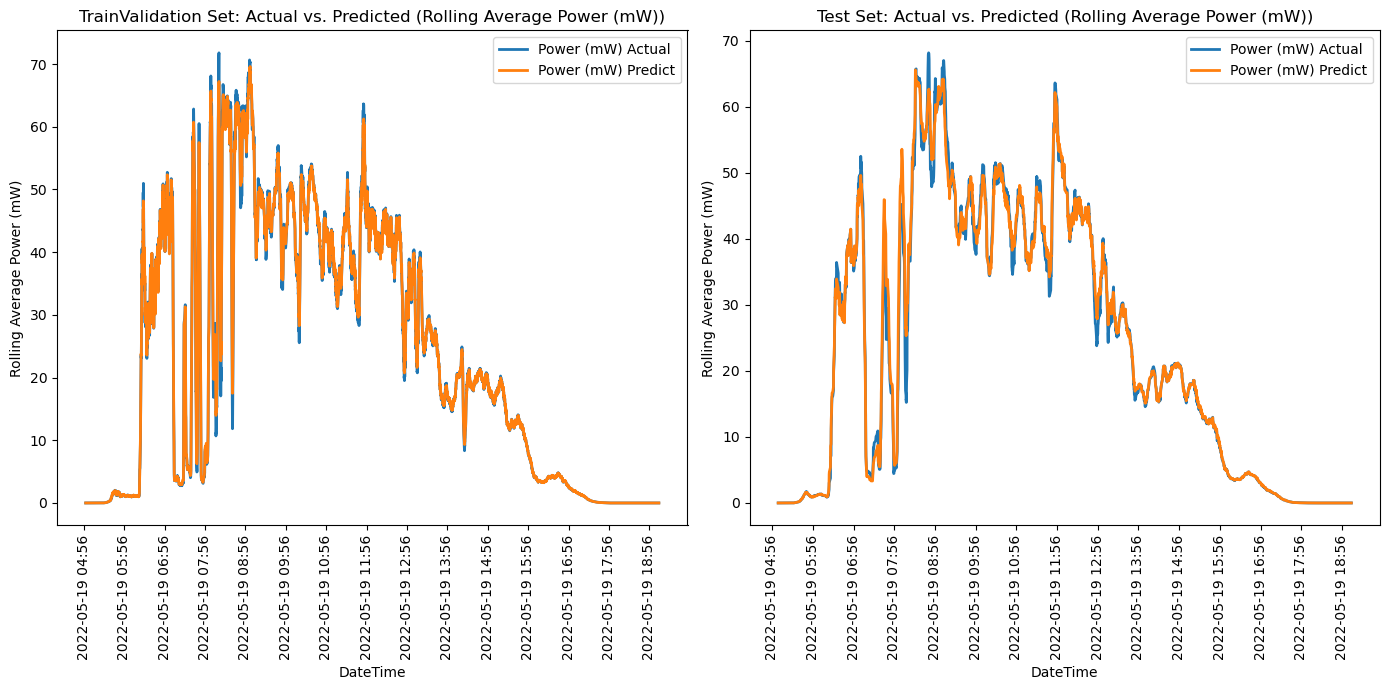

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_param_grid = {"n_estimators":[200,500,700],
                "criterion":["squared_error", "absolute_error"],
                "max_depth":[5,None]}

tup_rf=grid_search_report(RandomForestRegressor(random_state=47, n_jobs=-1), rf_param_grid, X_trainval, X_test, y_trainval, y_test, x_ticks)

Regression Model used: GradientBoostingRegressor
Grid Search Scorer/s used: ['r2', 'neg_mean_absolute_error']
Grid Search Scorer used to find best parameters: r2
Best parameters:  {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 1000}
Best cross-validation score (r2): 0.9372
...
R2 Score:
Train-Validation Set: 0.9989
Test Set: 0.9524
Mean Absolute Error:
Train-Validation Set: 0.5160mW
Test Set: 2.7913mW


,Power (mW) Actual,Power (mW) Predict
DateTime,,
2022-05-19 05:16:30,0.000050,-0.859534
2022-05-19 08:30:50,60.797730,62.765559
2022-05-19 18:54:04,0.000000,-0.238554
2022-05-19 06:54:15,19.418050,19.688915
2022-05-19 16:06:51,3.403700,3.540735


,Power (mW) Actual,Power (mW) Predict
DateTime,,
2022-05-19 14:21:46,13.092480,13.224717
2022-05-19 08:23:10,72.742500,65.401428
2022-05-19 18:33:27,0.000000,-0.252414
2022-05-19 16:09:31,4.313120,4.906825
2022-05-19 17:14:26,1.174860,0.644425


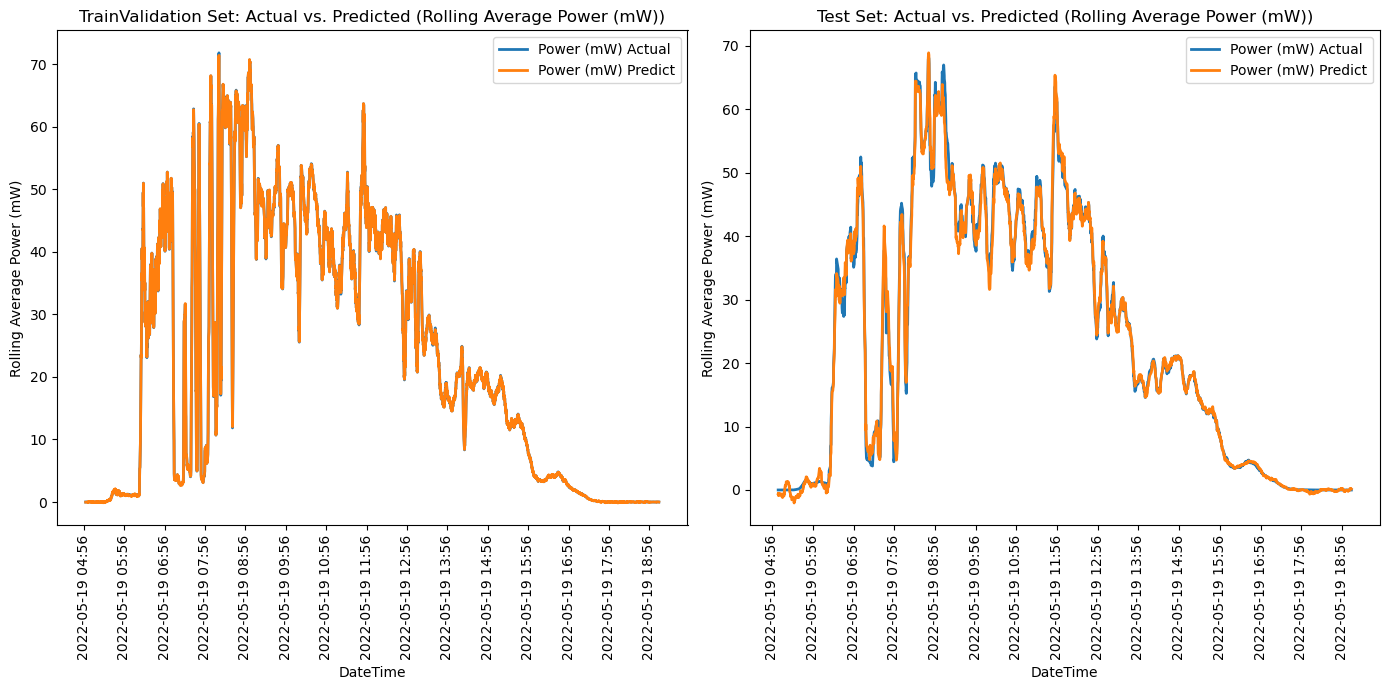

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_param_grid = {"learning_rate":[0.5, 0.8],
                 "n_estimators":[500,1000],
                 "max_depth":[5,None]}

tup_gbr=grid_search_report(GradientBoostingRegressor(random_state=47), gbr_param_grid, X_trainval, X_test, y_trainval, y_test, x_ticks)

Gradient Boosting Regressor has higher R2 score in the Cross Validation and Test Set compared to Random Forest Regressor but it also has a higher Mean Absolute Error compared to Random Forest Regresssor. Gradient Boosting Regressor also predict negative values while Random Forest only predicts zero as its lowest possible prediction value. To improve gradient boosting regressor's predicting performance and ability to consider zero/close to zero as its lower bounds of prediction, we can do logarithmic transformation but it would also increase/decrease the upper bounds of GBR's prediction and its MAE depending on the constant value applied to the transfromation. To remedy this situation, we will just transform GBR's negative prediction values to zero and see whether the MAE and R2 score of GBR will improve compared to Random Forest Regressor. If not, then we will use Random Forest Regressor as our final model for prediction.

In [26]:
#Create unclipped and clipped GBR lower bound prediction to zero 
GBR_trainval_predict_clipped = tup_gbr[0].predict(X_trainval).clip(min=0)
GBR_trainval_predict_unclipped = tup_gbr[0].predict(X_trainval)
GBR_test_predict_clipped = tup_gbr[0].predict(X_test).clip(min=0)
GBR_test_predict_unclipped = tup_gbr[0].predict(X_test)

In [27]:
print("Mean Absolute Error (Clipped):")
MAE_trainval_clipped = mean_absolute_error(y_trainval, GBR_trainval_predict_clipped)
MAE_test_clipped = mean_absolute_error(y_test, GBR_test_predict_clipped)
print("Train-Validation Set: {:.4f}mW".format(MAE_trainval_clipped))
print("Test Set: {:.4f}mW\n".format(MAE_test_clipped))

print("Mean Absolute Error (Unclipped):")
MAE_trainval_unclipped = mean_absolute_error(y_trainval, GBR_trainval_predict_unclipped)
MAE_test_unclipped = mean_absolute_error(y_test, GBR_test_predict_unclipped)
print("Train-Validation Set: {:.4f}mW".format(MAE_trainval_unclipped))
print("Test Set: {:.4f}mW\n".format(MAE_test_unclipped))

print("Based on the Test Set of Clipped and Unclipped Lower Bounds of GBR's Prediction...")
if MAE_test_clipped < MAE_test_unclipped:
    print("Assessment: Clip GBR's Prediction Lower Bounds ")
else:
    print("Assessment: Don't Clip GBR's Prediction Lower Bounds ")

Mean Absolute Error (Clipped):
Train-Validation Set: 0.4960mW
Test Set: 2.5328mW

Mean Absolute Error (Unclipped):
Train-Validation Set: 0.5160mW
Test Set: 2.7913mW

Based on the Test Set of Clipped and Unclipped Lower Bounds of GBR's Prediction...
Assessment: Clip GBR's Prediction Lower Bounds 


In [28]:
from sklearn.metrics import r2_score

print("R2 score (Clipped):")
R2_trainval_clipped = r2_score(y_trainval, GBR_trainval_predict_clipped)
R2_test_clipped = r2_score(y_test, GBR_test_predict_clipped)
print("Train-Validation Set: {:.4f}".format(R2_trainval_clipped))
print("Test Set: {:.4f}\n".format(R2_test_clipped))

print("R2 score (Unclipped):")
R2_trainval_unclipped = r2_score(y_trainval, GBR_trainval_predict_unclipped)
R2_test_unclipped = r2_score(y_test, GBR_test_predict_unclipped)
print("Train-Validation Set: {:.4f}".format(R2_trainval_unclipped))
print("Test Set: {:.4f}\n".format(R2_test_unclipped))

print("Based on the Test Set of Clipped and Unclipped Lower Bounds of GBR's Prediction...")
if R2_test_clipped > R2_test_unclipped:
    print("Assessment: Clip GBR's Prediction Lower Bounds ")
else:
    print("Assessment: Don't Clip GBR's Prediction Lower Bounds ")

R2 score (Clipped):
Train-Validation Set: 0.9989
Test Set: 0.9571

R2 score (Unclipped):
Train-Validation Set: 0.9989
Test Set: 0.9524

Based on the Test Set of Clipped and Unclipped Lower Bounds of GBR's Prediction...
Assessment: Clip GBR's Prediction Lower Bounds 


Based on the results of clipped and unclipped lower bounds of GBR's prediction, we can see that both MAE and R2 score improves and no scoring type became worse by clipping.

In [29]:
#Print CV results of GBR
display(pd.DataFrame(tup_gbr[1]))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_r2,split1_test_r2,...,std_test_r2,rank_test_r2,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
0,3.513615,0.036714,0.037943,0.000832,0.5,5,500,"{'learning_rate': 0.5, 'max_depth': 5, 'n_esti...",0.933608,0.948564,...,0.007111,2,-3.507921,-2.888245,-3.303775,-3.483559,-3.140597,-3.264819,0.230522,6
1,6.991176,0.313253,0.067612,0.003698,0.5,5,1000,"{'learning_rate': 0.5, 'max_depth': 5, 'n_esti...",0.934262,0.947373,...,0.006235,1,-3.474009,-2.919434,-3.275498,-3.455129,-3.133544,-3.251523,0.207717,5
2,1.069113,0.028722,0.014217,0.000258,0.5,None,500,"{'learning_rate': 0.5, 'max_depth': None, 'n_e...",0.856964,0.919309,...,0.020071,5,-3.403556,-2.503422,-2.759267,-2.854237,-2.876035,-2.879304,0.293658,1
3,1.306233,0.039246,0.016091,0.001565,0.5,None,1000,"{'learning_rate': 0.5, 'max_depth': None, 'n_e...",0.856964,0.919309,...,0.020071,5,-3.403556,-2.503422,-2.759267,-2.854237,-2.876035,-2.879304,0.293658,1
4,3.302946,0.147117,0.034259,0.001789,0.8,5,500,"{'learning_rate': 0.8, 'max_depth': 5, 'n_esti...",0.924047,0.936543,...,0.008085,4,-3.847653,-3.449686,-3.771965,-3.876077,-3.579821,-3.705040,0.164290,8
5,7.281524,0.116784,0.066574,0.001286,0.8,5,1000,"{'learning_rate': 0.8, 'max_depth': 5, 'n_esti...",0.923643,0.935632,...,0.007655,3,-3.850856,-3.474796,-3.776261,-3.852271,-3.553701,-3.701577,0.157396,7
6,0.696147,0.018990,0.011678,0.002335,0.8,None,500,"{'learning_rate': 0.8, 'max_depth': None, 'n_e...",0.853956,0.918235,...,0.020697,7,-3.420391,-2.521999,-2.776147,-2.863771,-2.885867,-2.893635,0.293374,3
7,1.022722,0.031080,0.010713,0.001095,0.8,None,1000,"{'learning_rate': 0.8, 'max_depth': None, 'n_e...",0.853956,0.918235,...,0.020697,7,-3.420391,-2.521999,-2.776147,-2.863771,-2.885867,-2.893635,0.293374,3


## Optimizing Servo Pair Angles

Based on the initial data gathered, we can already identify the best servo pair angles. But we can use the model that we developed to further gain insights or optimize the servo pair angles since the data we gathered only focused on specific sets of steps of servo angles.

In [30]:
#We previously identified that the pair of servo angles that has highest average power all through out the day were:
    #Servo Lower: 45
    #Servo Upper: 46
#Let's estimate the average power of other sets of servo pair angles (close to these servo angles which are (L: 45, U: 46))
#We will use the following data points
#Servo Lower Previous Bounds: 0,  #Servo Lower Next Bounds: 90,
#Servo Upper Previouse Bounds: 23, #Servo Upper Next Bounds: 69,

final_model = tup_gbr[0] #set our final model to GBR
servo_lower_set=np.linspace(0,90, num=11)
servo_upper_set=np.linspace(23,69, num=5)
print("Sets of Angle to Pair and Predict")
print("Servo lower set: ", servo_lower_set)
print("Servo upper set: ", servo_upper_set)

#Setup empty dataframe first filled with ones
servo_pairs_pred_ave_power = pd.DataFrame(1,index=servo_lower_set, columns=servo_upper_set)
servo_pairs_pred_ave_power.rename_axis("Servo Upper Angle", axis=1, inplace=True)
servo_pairs_pred_ave_power.rename_axis("Servo Lower Angle", axis=0, inplace=True)
for servo_lower_angle in servo_lower_set:
    for servo_upper_angle in servo_upper_set:
        data_to_predict=data_to_model.loc[:,:"Servo Upper"].copy() #get all x_predictor variables except y which is Power(mW) column
        data_to_predict["Servo Lower"] = servo_lower_angle
        data_to_predict["Servo Upper"] = servo_upper_angle
        power_predicted = final_model.predict(data_to_predict).clip(min=0) #clip predicted values such that no negative values in prediction
        average_power=np.mean(power_predicted)
        servo_pairs_pred_ave_power.loc[servo_lower_angle,servo_upper_angle] = average_power


display(servo_pairs_pred_ave_power.style.set_caption("Average Power (mW) Delivered based on Servo Angle Positions"))

Sets of Angle to Pair and Predict
Servo lower set:  [ 0.  9. 18. 27. 36. 45. 54. 63. 72. 81. 90.]
Servo upper set:  [23.  34.5 46.  57.5 69. ]


Servo Upper Angle,23.000000,34.500000,46.000000,57.500000,69.000000
Servo Lower Angle,,,,,
0.000000,25.593535,25.594966,27.957157,27.951605,26.719754
9.000000,25.593535,25.594966,27.957157,27.951605,26.719754
18.000000,25.593535,25.594966,27.957157,27.951605,26.719754
27.000000,25.594358,25.594790,28.110292,28.107796,26.617448
36.000000,25.594358,25.594790,28.110292,28.107796,26.617448
45.000000,25.594358,25.594790,28.110292,28.107796,26.617448
54.000000,25.587276,25.587709,28.103080,28.100583,26.609840
63.000000,25.587276,25.587709,28.103080,28.100583,26.609840
72.000000,24.593539,24.594033,27.609934,27.607437,26.364032


## Conclusions

Based on the prediciton models and data gathered, we can conclude that as for the current physical setup (location, current roofing materials and coatings used) where the device/module gathered the data, we can optimize the average power output of the solar panels during installment phase if we design the inclinations of our panel holders - the same way how the device/module identified its optimal inclinations (with estimated amount of tolerance) through the servo angle pairs which are - Servo Lower: 27°-45° and Servo Upper: 46° - 57.5°. But how can we design it based on pitch and roll angles?

Method 1: We can do these through setting up the device again to the physical location were it gathered the data, and set it up to move towards the optimal servo angle pairs and record its corresponding pitch and roll angles which will then be used to design the solar panel holders.

Method 2: We can also do these by training another machine learning model where we use Servo Lower and Servo Upper Angles as the predictor/X variables and the Pitch and Roll angles as the response/Y variables and then used the trained model to predict the pitch and roll angles of the optimal servo angle pairs.

But, it is highly recommeded to use Method 1. The results of other servo angle pairs are useful to set the amount of tolerance of the inclination angles on designing our solar panel holders. We can further improve our confidence of these optimization if we also create models where the variable we will be predicting is the Irradiance instead of Power.

## Recommendations

If more data and experimentations are done to other location and datetime, we can use the temperature and humidity variables to create a more generalized machine learning model if our goal is to improve efficiency of solar panels by improving temperature conditions. We could use the results to identify whether we need to improve roofing materials, or coatings, or choose the location that already have the best temperature conditions. We also recommend to develop the device even further to also record the yaw angles, and if possible to record the longitude, latitude, and altitude where the device was gathering data. This might be useful if we are to pool the data from different users and locations.

# Chapter 2: Transitioning to Cairo

Transitioning from our initial focus on correlating irradiance data with power output, we now aim to predict power generation based on servo angle pairs using PyTorch. This strategic pivot enhances our model's ability to capture complex, non-linear relationships inherent in solar panel positioning. Upon training, our model will be exported to ONNX format for compatibility, then further refined within Cairo & Orion environments through GizaTech's transpiler. This streamlined approach not only advances our predictive capabilities in optimizing solar power generation but also ensures robustness and adaptability of our machine learning model across diverse computational platforms, solidifying our commitment to leveraging cutting-edge technologies in renewable energy optimization.

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim

class RegressionNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)
    
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

# Example usage with your data and training loop
# Assuming X_trainval, y_trainval are already defined and loaded

input_size = X_trainval.shape[1]
hidden_size1 = 50  # First hidden layer size
hidden_size2 = 25  # Second hidden layer size
output_size = 1    # Predicting a single value

model = RegressionNet(input_size, hidden_size1, hidden_size2, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5000
for epoch in range(num_epochs):
    # Convert arrays to tensors
    inputs = torch.from_numpy(X_trainval.values.astype(np.float32))
    targets = torch.from_numpy(y_trainval.values.astype(np.float32)).view(-1, 1)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')


Epoch [1000/5000], Loss: 288.4549255371094
Epoch [2000/5000], Loss: 224.36328125
Epoch [3000/5000], Loss: 186.17735290527344
Epoch [4000/5000], Loss: 162.6124725341797
Epoch [5000/5000], Loss: 154.08238220214844


Now, let's try to improve the parameters and hyperparameters of our model by doing grid search.

In [90]:
from sklearn.metrics import r2_score

@task(name=f"Split Dataset")
def split_dataset(X, y, test_size=0.25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=47)
    
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    return  X_train, X_test, y_train, y_test

@task(name=f"Evaluate Model")
def evaluate_model(model, X_val, y_val):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
        predictions = model(X_val)
        predictions = predictions.squeeze()  # If model outputs a single value per sample with an extra dimension
    model.train()  # Set the model back to train mode
    
    # Calculate the R2 score
    r2 = r2_score(y_val.cpu().numpy(), predictions.cpu().numpy())
    return r2

@task(name=f"Model Training")
def train_model(model, optimizer, criterion, inputs, targets, num_epochs=1000):
    # Forward pass
    for epoch in range(num_epochs):
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 1000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')


# Function to create a new optimizer with the given parameters
# @task(name=f"Create Optimizer") //removed it as task as it causes bugs and won't see the model.parameters()
def create_optimizer(optimizer_name, parameters, lr, weight_decay):
    if optimizer_name == 'Adam':
        return optim.Adam(parameters, lr=lr, weight_decay=weight_decay)
    elif optimizer_name == 'RMSprop':
        return optim.RMSprop(parameters, lr=lr, weight_decay=weight_decay)
    elif optimizer_name == "Adagrad":
        return optim.Adagrad(parameters, lr=lr, weight_decay=weight_decay)
    else:
        raise ValueError(f'Unknown optimizer: {optimizer_name}') #Implement other optimizers

@action(name=f"Grid Search Model")
def grid_search_model():
    #Parameter grid for Optimization
    parameter_grid = {
        'criterion': [nn.MSELoss()],
        'optimizer': ['Adam'],
        'lr': [0.01, 0.001],
        'weight_decay': [0, 0.0001],  # L2 regularization
    }
    
    # Placeholder for best model and best score
    best_score_val = float('-inf')
    best_params = {}
    best_model = None
    best_optimizer = None
    best_criterion = None

    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=47)

    inputs = torch.from_numpy(X_train.values.astype(np.float32))
    targets = torch.from_numpy(y_train.values.astype(np.float32)).view(-1, 1)

    val_inputs = torch.from_numpy(X_val.values.astype(np.float32))
    val_targets = torch.from_numpy(y_val.values.astype(np.float32)).view(-1, 1)

    # Iterate over all combinations of parameters
    for criterion in parameter_grid['criterion']:
        for optimizer_name in parameter_grid['optimizer']:
            for lr in parameter_grid['lr']:
                for weight_decay in parameter_grid['weight_decay']:
                    # Print the parameters before training
                    current_params = {
                        'criterion': criterion,
                        'optimizer': optimizer_name,
                        'lr': lr,
                        'weight_decay': weight_decay
                    }
                    print(f'Training with parameters: {current_params}')

                    # Create a new model
#                     input_size = X_train.shape[1]
#                     hidden_size1 = 100  # first hidden layer size
#                     hidden_size2 = 50   # second hidden layer size
#                     hidden_size3 = 25   # third hidden layer size
#                     output_size = 1     # Predicting a single value
#                     model = RegressionNet(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)
                    
                    input_size = X_trainval.shape[1]
                    hidden_size1 = 50  # First hidden layer size
                    hidden_size2 = 25  # Second hidden layer size
                    output_size = 1    # Predicting a single value

                    model = RegressionNet(input_size, hidden_size1, hidden_size2, output_size)
    
                    optimizer = create_optimizer(optimizer_name, model.parameters(), lr, weight_decay)

                    # Train the model (you need to implement the training loop)
                    train_model(model, optimizer, criterion, inputs, targets, num_epochs=3000)

                    # Evaluate the model (you need to implement this)
                    score_train = evaluate_model(model, inputs, targets)
                    score_val = evaluate_model(model, val_inputs, val_targets)
                    print(f"Train Score: {score_train}")
                    print(f"Test Score: {score_val}")

                    # Update best score and parameters
                    if score_val > best_score_val:
                        best_score_val = score_val
                        best_model = model
                        best_optimizer = optimizer
                        best_criterion = criterion
                        best_params = {
                            'criterion': criterion,
                            'optimizer': optimizer_name,
                            'lr': lr,
                            'weight_decay': weight_decay
                        }

    print(f'Best validation score achieved: {best_score_val}')
    print(f'Best parameters: {best_params}')
    print("✅ Grid Search Done.")
    return best_model, best_optimizer, best_criterion


best_model, best_optimizer, best_criterion = grid_search_model()

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\tasks.py:337: UserWarning: A task named 'Split Dataset' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\task.py:3' conflicts with another task. Consider specifying a unique `name` parameter in the task definition:

 `@task(name='my_unique_name', ...)`
  warnings.warn(
C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\tasks.py:337: UserWarning: A task named 'Evaluate Model' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\task.py:10' conflicts with another task. Consider specifying a unique `name` parameter in the task definition:

 `@task(name='my_unique_name', ...)`
  warnings.warn(
C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\tasks.py:337: UserWarning: A task named 'Model Training' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_action

03:48:29.722 | INFO    | Created flow run 'magnificent-quail' for flow 'Grid Search Model'

03:48:29.726 | INFO    | Action run 'magnificent-quail' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/c1cef89f-9216-4fea-929b-3fd9ed344b20

Training with parameters: {'criterion': MSELoss(), 'optimizer': 'Adam', 'lr': 0.01, 'weight_decay': 0}


03:48:30.714 | INFO    | Action run 'magnificent-quail' - Created task run 'Model Training-0' for task 'Model Training'

03:48:30.718 | INFO    | Action run 'magnificent-quail' - Executing 'Model Training-0' immediately...

Epoch [1000/3000], Loss: 155.47999572753906
Epoch [2000/3000], Loss: 143.05029296875
Epoch [3000/3000], Loss: 138.78419494628906


03:48:43.474 | INFO    | Task run 'Model Training-0' - Finished in state Completed()

03:48:43.802 | INFO    | Action run 'magnificent-quail' - Created task run 'Evaluate Model-0' for task 'Evaluate Model'

03:48:43.805 | INFO    | Action run 'magnificent-quail' - Executing 'Evaluate Model-0' immediately...

03:48:44.822 | INFO    | Task run 'Evaluate Model-0' - Finished in state Completed()

03:48:45.158 | INFO    | Action run 'magnificent-quail' - Created task run 'Evaluate Model-1' for task 'Evaluate Model'

03:48:45.160 | INFO    | Action run 'magnificent-quail' - Executing 'Evaluate Model-1' immediately...

03:48:46.181 | INFO    | Task run 'Evaluate Model-1' - Finished in state Completed()

Train Score: 0.7384821346373882
Test Score: 0.6773614319087025
Training with parameters: {'criterion': MSELoss(), 'optimizer': 'Adam', 'lr': 0.01, 'weight_decay': 0.0001}


03:48:46.515 | INFO    | Action run 'magnificent-quail' - Created task run 'Model Training-1' for task 'Model Training'

03:48:46.518 | INFO    | Action run 'magnificent-quail' - Executing 'Model Training-1' immediately...

Epoch [1000/3000], Loss: 161.7169647216797
Epoch [2000/3000], Loss: 143.84678649902344
Epoch [3000/3000], Loss: 139.31045532226562


03:49:01.061 | INFO    | Task run 'Model Training-1' - Finished in state Completed()

03:49:01.402 | INFO    | Action run 'magnificent-quail' - Created task run 'Evaluate Model-2' for task 'Evaluate Model'

03:49:01.405 | INFO    | Action run 'magnificent-quail' - Executing 'Evaluate Model-2' immediately...

03:49:02.430 | INFO    | Task run 'Evaluate Model-2' - Finished in state Completed()

03:49:02.778 | INFO    | Action run 'magnificent-quail' - Created task run 'Evaluate Model-3' for task 'Evaluate Model'

03:49:02.781 | INFO    | Action run 'magnificent-quail' - Executing 'Evaluate Model-3' immediately...

03:49:03.830 | INFO    | Task run 'Evaluate Model-3' - Finished in state Completed()

Train Score: 0.7406170172864621
Test Score: 0.65948460765106
Training with parameters: {'criterion': MSELoss(), 'optimizer': 'Adam', 'lr': 0.001, 'weight_decay': 0}


03:49:04.169 | INFO    | Action run 'magnificent-quail' - Created task run 'Model Training-2' for task 'Model Training'

03:49:04.173 | INFO    | Action run 'magnificent-quail' - Executing 'Model Training-2' immediately...

Epoch [1000/3000], Loss: 233.25868225097656
Epoch [2000/3000], Loss: 155.85702514648438
Epoch [3000/3000], Loss: 136.83465576171875


03:49:17.469 | INFO    | Task run 'Model Training-2' - Finished in state Completed()

03:49:17.813 | INFO    | Action run 'magnificent-quail' - Created task run 'Evaluate Model-4' for task 'Evaluate Model'

03:49:17.817 | INFO    | Action run 'magnificent-quail' - Executing 'Evaluate Model-4' immediately...

03:49:18.831 | INFO    | Task run 'Evaluate Model-4' - Finished in state Completed()

03:49:19.189 | INFO    | Action run 'magnificent-quail' - Created task run 'Evaluate Model-5' for task 'Evaluate Model'

03:49:19.192 | INFO    | Action run 'magnificent-quail' - Executing 'Evaluate Model-5' immediately...

03:49:20.209 | INFO    | Task run 'Evaluate Model-5' - Finished in state Completed()

Train Score: 0.7450559549210709
Test Score: 0.7068075463994359
Training with parameters: {'criterion': MSELoss(), 'optimizer': 'Adam', 'lr': 0.001, 'weight_decay': 0.0001}


03:49:20.543 | INFO    | Action run 'magnificent-quail' - Created task run 'Model Training-3' for task 'Model Training'

03:49:20.547 | INFO    | Action run 'magnificent-quail' - Executing 'Model Training-3' immediately...

Epoch [1000/3000], Loss: 224.56207275390625
Epoch [2000/3000], Loss: 160.01962280273438
Epoch [3000/3000], Loss: 145.48550415039062


03:49:34.035 | INFO    | Task run 'Model Training-3' - Finished in state Completed()

03:49:34.383 | INFO    | Action run 'magnificent-quail' - Created task run 'Evaluate Model-6' for task 'Evaluate Model'

03:49:34.386 | INFO    | Action run 'magnificent-quail' - Executing 'Evaluate Model-6' immediately...

03:49:35.409 | INFO    | Task run 'Evaluate Model-6' - Finished in state Completed()

03:49:35.743 | INFO    | Action run 'magnificent-quail' - Created task run 'Evaluate Model-7' for task 'Evaluate Model'

03:49:35.746 | INFO    | Action run 'magnificent-quail' - Executing 'Evaluate Model-7' immediately...

03:49:36.755 | INFO    | Task run 'Evaluate Model-7' - Finished in state Completed()

Train Score: 0.7287341921720922
Test Score: 0.6641691803530844
Best validation score achieved: 0.7068075463994359
Best parameters: {'criterion': MSELoss(), 'optimizer': 'Adam', 'lr': 0.001, 'weight_decay': 0}
✅ Grid Search Done.


03:49:37.093 | INFO    | Action run 'magnificent-quail' - Finished in state Completed()

In [55]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Evaluate the model with your test set
@task(name=f"Test model")
def test_model(model, inputs_test, labels_test):
    print("Testing model...")
    # Set the model to evaluation mode
    model.eval()

    # Disable gradient calculations
    with torch.no_grad():
        outputs_test = model(inputs_test)

    # Convert PyTorch tensors to numpy arrays for scoring
    labels_np = labels_test.numpy()
    outputs_np = outputs_test.numpy()

    # Calculate R2 score, MAE, RMSE, and MSE
    r2 = r2_score(labels_np, outputs_np)
    mae = mean_absolute_error(labels_np, outputs_np)
    mse = mean_squared_error(labels_np, outputs_np)
    rmse = np.sqrt(mse)

    print(f'R2 Score: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MSE: {mse:.4f}')
    print("✅ Model tested successfully")
    return r2, mae, rmse, mse

@action(name=f"Execution")
def execution():
    #Training
    train_inputs = torch.from_numpy(X_trainval.values.astype(np.float32))
    train_targets = torch.from_numpy(y_trainval.values.astype(np.float32)).view(-1, 1)
    model = train_model(best_model, best_optimizer, best_criterion, train_inputs, train_targets, 5000)
    
    #Testing
    test_inputs = torch.from_numpy(X_test.values.astype(np.float32))
    test_targets = torch.from_numpy(y_test.values.astype(np.float32)).view(-1, 1)

    test_model(best_model, test_inputs, test_targets)
    return model

execution()

03:18:15.709 | INFO    | Created flow run 'peculiar-echidna' for flow 'Execution'

03:18:15.714 | INFO    | Action run 'peculiar-echidna' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/dddf55be-b2bc-4fe7-a842-6d34a7eb68c2

03:18:16.724 | INFO    | Action run 'peculiar-echidna' - Created task run 'Model Training-0' for task 'Model Training'

03:18:16.727 | INFO    | Action run 'peculiar-echidna' - Executing 'Model Training-0' immediately...

Epoch [1000/5000], Loss: 119.73497772216797
Epoch [2000/5000], Loss: 115.83123779296875
Epoch [3000/5000], Loss: 123.65974426269531
Epoch [4000/5000], Loss: 113.638427734375
Epoch [5000/5000], Loss: 99.843505859375


03:18:40.640 | INFO    | Task run 'Model Training-0' - Finished in state Completed()

03:18:40.986 | INFO    | Action run 'peculiar-echidna' - Created task run 'Test model-0' for task 'Test model'

03:18:40.988 | INFO    | Action run 'peculiar-echidna' - Executing 'Test model-0' immediately...

Testing model...
R2 Score: 0.7785
MAE: 6.9829
RMSE: 10.9487
MSE: 119.8747
✅ Model tested successfully


03:18:42.047 | INFO    | Task run 'Test model-0' - Finished in state Completed()

03:18:42.411 | INFO    | Action run 'peculiar-echidna' - Finished in state Completed('All states completed.')

[Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `NoneType`')),
 Completed(message=None, type=COMPLETED, result=UnpersistedResult(type='unpersisted', artifact_type='result', artifact_description='Unpersisted result of type `tuple`'))]

Compare to our Gradient Boosting Regressor and Random Forest Model, our model yielded an R2 score of 0.70+ which is a good indicator that our model have learned enough to create good estimation/prediction for the solar output of our device. Now, we need to convert the model into ONNX and transpile, deploy, and get a proof of inference using the Giza-CLI.

In [56]:
import torch
import torch.onnx

@action(name="Model Conversion to ONNX")
def onnx_model_conversion():
    # 'input_size' is the size of model's input
    input_size = X_trainval.shape[1]
    dummy_input = torch.randn(1, input_size, dtype=torch.float32)

    # Set the model to evaluation mode
    model.eval()

    # Export the model
    torch.onnx.export(model,               # model being run
                      dummy_input,         # model input (or a tuple for multiple inputs)
                      "SPPOM_model.onnx",        # where to save the model (can be a file or file-like object)
                      export_params=True,  # store the trained parameter weights inside the model file
                      opset_version=10,    # the ONNX version to export the model to
                      do_constant_folding=True,  # whether to execute constant folding for optimization
                      input_names = ['input'],   # the model's input names
                      output_names = ['output'], # the model's output names
                      dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
                                    'output' : {0 : 'batch_size'}})
    
onnx_model_conversion()

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\flows.py:338: UserWarning: A flow named 'Model Conversion to ONNX' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\action.py:4' conflicts with another flow. Consider specifying a unique `name` parameter in the flow definition:

 `@flow(name='my_unique_name', ...)`
  warnings.warn(


03:18:43.878 | INFO    | Created flow run 'aromatic-rabbit' for flow 'Model Conversion to ONNX'

03:18:43.882 | INFO    | Action run 'aromatic-rabbit' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/7b2f4f68-bebd-4484-9b19-010752fc172e

03:18:44.990 | INFO    | Action run 'aromatic-rabbit' - Finished in state Completed()

In [57]:
import onnx

# Reading the ONNX model from file
loaded_model = onnx.load("SPPOM_model.onnx")

# Looping over all nodes within the model graph
for each_node in loaded_model.graph.node:
    print(f"Node Type: {each_node.op_type}")  # Displaying the type of operation for each node
    # Display additional information about each node
    print(f"Node Inputs: {each_node.input}, Node Outputs: {each_node.output}")
    print("===")  # Separator for readability

Node Type: Gemm
Node Inputs: ['input', 'fc1.weight', 'fc1.bias'], Node Outputs: ['/fc1/Gemm_output_0']
===
Node Type: Relu
Node Inputs: ['/fc1/Gemm_output_0'], Node Outputs: ['/relu1/Relu_output_0']
===
Node Type: Gemm
Node Inputs: ['/relu1/Relu_output_0', 'fc2.weight', 'fc2.bias'], Node Outputs: ['/fc2/Gemm_output_0']
===
Node Type: Relu
Node Inputs: ['/fc2/Gemm_output_0'], Node Outputs: ['/relu2/Relu_output_0']
===
Node Type: Gemm
Node Inputs: ['/relu2/Relu_output_0', 'fc3.weight', 'fc3.bias'], Node Outputs: ['output']
===


## Creating Verifiable Predictions using Giza Model

In [72]:
from giza_actions.model import GizaModel

model_identifier = 308  # Customize with the specific model ID
version_identifier = 3  # Customize with the specific version ID

@task(name='Generate Prediction')
def predict_output(data_for_prediction, model_id, version_id):
    # Initialize the prediction model with the given model and version IDs.
    prediction_model = GizaModel(
        id=model_id,
        version=version_id
    )
    
    # Perform prediction using the model's predict method and ensure output integrity.
    prediction_result, prediction_tracking_id = prediction_model.predict(
        input_feed={"DataForPrediction": data_for_prediction}, 
        verifiable=True
    )
    print(prediction_result)
    print(prediction_tracking_id)
    return prediction_result, prediction_tracking_id

@action(name='Execute Prediction Process', log_prints=True)
def execute_prediction():
    single_test_sample = X_test.values[1].astype('float32').reshape(1, -1)
    # Using a single sample from the test set for making a prediction
    prediction_result, operation_tracking_id = predict_output(single_test_sample, model_identifier, version_identifier) 
    return prediction_result, operation_tracking_id

execute_prediction()

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\tasks.py:337: UserWarning: A task named 'Generate Prediction' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\task.py:6' conflicts with another task. Consider specifying a unique `name` parameter in the task definition:

 `@task(name='my_unique_name', ...)`
  warnings.warn(
C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\flows.py:338: UserWarning: A flow named 'Execute Prediction Process' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\action.py:23' conflicts with another flow. Consider specifying a unique `name` parameter in the flow definition:

 `@flow(name='my_unique_name', ...)`
  warnings.warn(


03:30:59.578 | INFO    | Created flow run 'savvy-bulldog' for flow 'Execute Prediction Process'

03:30:59.582 | INFO    | Action run 'savvy-bulldog' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/f0e033a2-72be-47b8-a1a5-882618cdb138

03:31:01.567 | INFO    | Action run 'savvy-bulldog' - Created task run 'Generate Prediction-0' for task 'Generate Prediction'

03:31:01.571 | INFO    | Action run 'savvy-bulldog' - Executing 'Generate Prediction-0' immediately...

03:31:05.382 | ERROR   | OrionRunner service error: Running the Cairo  programm failed

03:31:05.386 | ERROR   | An error occurred in predict: OrionRunner service error: Running the Cairo  programm failed

03:31:05.390 | INFO    | Task run 'Generate Prediction-0' - None

03:31:05.394 | INFO    | Task run 'Generate Prediction-0' - None

03:31:05.791 | INFO    | Task run 'Generate Prediction-0' - Finished in state Completed()

03:31:06.151 | INFO    | Action run 'savvy-bulldog' - Finished in state Completed()

(None, None)

Since we are encountering transpilation partially support warning during the transpilation of the model. This could be one source of error for  orion runner service error. In this case let's explore another use case for our dataset. Let's predict the corresponding average irradiance for each average power estimation derived from the Solar PV Positioning Optimizer Module (SPPOM) on Cairo. With this we are expected to use a simple linear regression model, thus we are less concerned with operator support with Giza's transpiler.

In [73]:
#Lets explore the correlation coefficient of power and irridiance from the raw data before training our Linear Regression Model
corr_matrix = np.corrcoef(power_pd.values.flatten(),irradiance_pd.values.flatten())
display(pd.DataFrame(corr_matrix, columns=["Power","Irradiance"], index=["Power","Irradiance"]))

,Power,Irradiance
Power,1.00000,0.99509
Irradiance,0.99509,1.00000


In [74]:
X = power_pd.values.reshape(-1, 1)
Y = irradiance_pd.values.flatten()

In [75]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

0.9902050433019366

In [76]:
servo_pairs_pred_ave_power_stacked = servo_pairs_pred_ave_power.stack().reset_index()
servo_pairs_pred_ave_power_stacked = servo_pairs_pred_ave_power_stacked.rename(columns={0:"Average Power (mW)"})
display(servo_pairs_pred_ave_power_stacked)

,Servo Lower Angle,Servo Upper Angle,Average Power (mW)
0,0.0,23.0,25.593535
1,0.0,34.5,25.594966
2,0.0,46.0,27.957157
3,0.0,57.5,27.951605
4,0.0,69.0,26.719754
5,9.0,23.0,25.593535
6,9.0,34.5,25.594966
7,9.0,46.0,27.957157
8,9.0,57.5,27.951605
9,9.0,69.0,26.719754


In [77]:
ave_irridiance = reg.predict(servo_pairs_pred_ave_power_stacked["Average Power (mW)"].values.reshape(-1,1))
servo_pairs_pred_ave_power_stacked["Average Irradiance (W/m2)"] = ave_irridiance
display(servo_pairs_pred_ave_power_stacked)

,Servo Lower Angle,Servo Upper Angle,Average Power (mW),Average Irradiance (W/m2)
0,0.0,23.0,25.593535,108.385501
1,0.0,34.5,25.594966,108.389398
2,0.0,46.0,27.957157,114.822175
3,0.0,57.5,27.951605,114.807056
4,0.0,69.0,26.719754,111.452449
5,9.0,23.0,25.593535,108.385501
6,9.0,34.5,25.594966,108.389398
7,9.0,46.0,27.957157,114.822175
8,9.0,57.5,27.951605,114.807056
9,9.0,69.0,26.719754,111.452449


Now that we have computed the average irridiance per each servo angle positions, let's convert the model we have trained on the python enviroment to cairo.

In [84]:
# Define the model
class RidgeReg(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(RidgeReg, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

In [92]:
@task(name=f"Training Model")
def train_model_linear_reg(model, criterion, optimizer, inputs, labels, num_epochs=200):
    lambda_l2 = 0.01
    # Decrease the learning rate if necessary or make it an adjustable parameter
    # optimizer = optim.SGD(model.parameters(), lr=0.001) # Example adjustment, if not set outside
    
    for epoch in range(num_epochs):  # Number of epochs
        optimizer.zero_grad()  # Zero the gradients
        
        outputs = model(inputs)  # Forward pass: Compute predicted y by passing x to the model
        outputs = torch.nan_to_num(outputs, nan=0.0)  # Convert nan to 0 in outputs to avoid propagation
        
        mse_loss = criterion(outputs, labels)  # Compute MSE loss
        
        l2_regularization = sum(param.pow(2.0).sum() for param in model.parameters())
        loss = mse_loss + lambda_l2 * l2_regularization  # Add L2 regularization term
        
        loss.backward()  # Backward pass: Compute gradient of the loss with respect to model parameters
        
        # Implement gradient clipping to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        
        optimizer.step()  # Perform a single optimization step (parameter update)
        
        # Convert potential 'inf' or very large loss to 'nan' to zero to avoid breaking the training loop
        if torch.isinf(loss) or torch.isnan(loss):
            print(f"Warning: Loss is {loss.item()} at epoch {epoch+1}, adjusting...")
            continue  # Optionally skip steps or adjust learning rate dynamically here
        
        # Print loss every few epochs
        if epoch % 1000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    print("Model trained successfully. ✅")
    return model

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\tasks.py:337: UserWarning: A task named 'Training Model' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\task.py:1' conflicts with another task. Consider specifying a unique `name` parameter in the task definition:

 `@task(name='my_unique_name', ...)`
  warnings.warn(


In [86]:
@task(name=f"Testing Model")
def test_model(model, inputs_test, labels_test):
    print("Testing model...")
    # Set the model to evaluation mode
    model.eval()

    # Disable gradient calculations
    with torch.no_grad():
        outputs_test = model(inputs_test)

    # Convert PyTorch tensors to numpy arrays for scoring
    labels_np = labels_test.numpy()
    outputs_np = outputs_test.numpy()

    # Calculate R2 score, MAE, RMSE, and MSE
    r2 = r2_score(labels_np, outputs_np)
    mae = mean_absolute_error(labels_np, outputs_np)
    mse = mean_squared_error(labels_np, outputs_np)
    rmse = np.sqrt(mse)

    print("✅ Model tested successfully")
    print(f'R2 Score: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'MSE: {mse:.4f}')
    return r2, mae, rmse, mse

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\tasks.py:337: UserWarning: A task named 'Testing Model' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\task.py:1' conflicts with another task. Consider specifying a unique `name` parameter in the task definition:

 `@task(name='my_unique_name', ...)`
  warnings.warn(


In [97]:
@action(name=f"Execution", log_prints=True)
def execution():
    X_trainVal, X_test, y_trainVal, y_test = split_dataset(X,Y, test_size=0.20)
    input_size = X_trainVal.shape[1]
    
    # Initialize model, loss, and optimizer
    input_dim = input_size  # input dimension
    output_dim = 1  # output dimension
    model = RidgeReg(input_dim, output_dim)
    criterion = nn.MSELoss()  # Mean Squared Error Loss
    optimizer = optim.Adam(model.parameters(), lr=0.05)  # Stochastic Gradient Descent

    # Regularization parameter
    lambda_l2 = 0.01
    
    model = train_model_linear_reg(model, criterion, optimizer, torch.tensor(X_trainVal, dtype=torch.float32), torch.tensor(y_trainVal, dtype=torch.float32).view(-1, 1), 5000)
    test_model(model, torch.tensor(X_test,dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32).view(-1, 1))
    print("Testing Done...")
    return model, input_size
    
    
model,input_size = execution()

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\flows.py:338: UserWarning: A flow named 'Execution' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\action.py:1' conflicts with another flow. Consider specifying a unique `name` parameter in the flow definition:

 `@flow(name='my_unique_name', ...)`
  warnings.warn(


03:51:29.557 | INFO    | Created flow run 'gabby-oyster' for flow 'Execution'

03:51:29.561 | INFO    | Action run 'gabby-oyster' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/7a83ad79-53d8-46e9-b1a1-04102c62770b

03:51:30.529 | INFO    | Action run 'gabby-oyster' - Created task run 'Split Dataset-0' for task 'Split Dataset'

03:51:30.534 | INFO    | Action run 'gabby-oyster' - Executing 'Split Dataset-0' immediately...

03:51:31.559 | INFO    | Task run 'Split Dataset-0' - (20, 1) (5, 1) (20,) (5,)

03:51:31.907 | INFO    | Task run 'Split Dataset-0' - Finished in state Completed()

03:51:32.242 | INFO    | Action run 'gabby-oyster' - Created task run 'Training Model-0' for task 'Training Model'

03:51:32.246 | INFO    | Action run 'gabby-oyster' - Executing 'Training Model-0' immediately...

03:51:32.934 | INFO    | Task run 'Training Model-0' - Epoch [1/5000], Loss: 9754.2441

03:51:34.331 | INFO    | Task run 'Training Model-0' - Epoch [1001/5000], Loss: 10.1993

03:51:35.666 | INFO    | Task run 'Training Model-0' - Epoch [2001/5000], Loss: 10.2114

03:51:36.993 | INFO    | Task run 'Training Model-0' - Epoch [3001/5000], Loss: 10.2192

03:51:38.310 | INFO    | Task run 'Training Model-0' - Epoch [4001/5000], Loss: 10.2201

03:51:39.650 | INFO    | Task run 'Training Model-0' - Model trained successfully. ✅

03:51:40.000 | INFO    | Task run 'Training Model-0' - Finished in state Completed()

03:51:40.348 | INFO    | Action run 'gabby-oyster' - Created task run 'Testing Model-0' for task 'Testing Model'

03:51:40.352 | INFO    | Action run 'gabby-oyster' - Executing 'Testing Model-0' immediately...

03:51:41.315 | INFO    | Task run 'Testing Model-0' - Testing model...

03:51:41.323 | INFO    | Task run 'Testing Model-0' - ✅ Model tested successfully

03:51:41.327 | INFO    | Task run 'Testing Model-0' - R2 Score: 0.8731

03:51:41.331 | INFO    | Task run 'Testing Model-0' - MAE: 3.9618

03:51:41.334 | INFO    | Task run 'Testing Model-0' - RMSE: 5.0154

03:51:41.337 | INFO    | Task run 'Testing Model-0' - MSE: 25.1545

03:51:41.686 | INFO    | Task run 'Testing Model-0' - Finished in state Completed()

03:51:41.691 | INFO    | Action run 'gabby-oyster' - Testing Done...

03:51:42.038 | INFO    | Action run 'gabby-oyster' - Finished in state Completed()

In [98]:
import torch
import torch.onnx

@action(name="Model Conversion to ONNX")
def onnx_model_conversion():
    # Assuming 'input_size' is the size of model's input
    dummy_input = torch.randn(1, input_size, dtype=torch.float32)

    # Set the model to evaluation mode
    model.eval()

    # Export the model
    torch.onnx.export(model,               # model being run
                      dummy_input,         # model input (or a tuple for multiple inputs)
                      "SPPOM_linear_model.onnx",        # where to save the model (can be a file or file-like object)
                      export_params=True,  # store the trained parameter weights inside the model file
                      opset_version=10,    # the ONNX version to export the model to
                      do_constant_folding=True,  # whether to execute constant folding for optimization
                      input_names = ['input'],   # the model's input names
                      output_names = ['output'], # the model's output names
                      dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
                                    'output' : {0 : 'batch_size'}})
    
onnx_model_conversion()

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\flows.py:338: UserWarning: A flow named 'Model Conversion to ONNX' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\action.py:4' conflicts with another flow. Consider specifying a unique `name` parameter in the flow definition:

 `@flow(name='my_unique_name', ...)`
  warnings.warn(


03:51:45.818 | INFO    | Created flow run 'loose-bonobo' for flow 'Model Conversion to ONNX'

03:51:45.822 | INFO    | Action run 'loose-bonobo' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/4ce89cb2-014b-4a21-b009-0bd363338287

03:51:46.815 | INFO    | Action run 'loose-bonobo' - Finished in state Completed()

In [100]:
import onnx

# Reading the ONNX model from file
loaded_model = onnx.load("SPPOM_linear_model.onnx")

# Looping over all nodes within the model graph
for each_node in loaded_model.graph.node:
    print(f"Node Type: {each_node.op_type}")  # Displaying the type of operation for each node
    # Display additional information about each node
    print(f"Node Inputs: {each_node.input}, Node Outputs: {each_node.output}")
    print("===")  # Separator for readability

Node Type: Gemm
Node Inputs: ['input', 'linear.weight', 'linear.bias'], Node Outputs: ['output']
===


## Creating Verifiable Prediction using Giza Model

In [102]:
from giza_actions.model import GizaModel

model_identifier = 310  # Customize with the specific model ID
version_identifier = 1  # Customize with the specific version ID

@task(name='Generate Prediction')
def predict_output(data_for_prediction, model_id, version_id):
    # Initialize the prediction model with the given model and version IDs.
    prediction_model = GizaModel(
        id=model_id,
        version=version_id
    )
    
    # Perform prediction using the model's predict method and ensure output integrity.
    prediction_result, prediction_tracking_id = prediction_model.predict(
        input_feed={"DataForPrediction": data_for_prediction}, 
        verifiable=True
    )
    print(prediction_result)
    print(prediction_tracking_id)
    return prediction_result, prediction_tracking_id

@action(name='Execute Prediction Process', log_prints=True)
def execute_prediction():
    X_trainVal, X_test, y_trainVal, y_test = split_dataset(X,Y, test_size=0.20)
    single_test_sample = X_test[1].astype('float32').reshape(1, -1)
    # Using a single sample from the test set for making a prediction
    prediction_result, operation_tracking_id = predict_output(single_test_sample, model_identifier, version_identifier) 
    return prediction_result, operation_tracking_id

execute_prediction()

C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\tasks.py:337: UserWarning: A task named 'Generate Prediction' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\task.py:6' conflicts with another task. Consider specifying a unique `name` parameter in the task definition:

 `@task(name='my_unique_name', ...)`
  warnings.warn(
C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\prefect\flows.py:338: UserWarning: A flow named 'Execute Prediction Process' and defined at 'C:\Users\Predator\AppData\Roaming\Python\Python311\site-packages\giza_actions\action.py:23' conflicts with another flow. Consider specifying a unique `name` parameter in the flow definition:

 `@flow(name='my_unique_name', ...)`
  warnings.warn(


03:57:45.456 | INFO    | Created flow run 'precious-jackal' for flow 'Execute Prediction Process'

03:57:45.460 | INFO    | Action run 'precious-jackal' - View at https://actions-server-williamskie123-dblzzhtf5q-ew.a.run.app/flow-runs/flow-run/a60e9e68-6a4f-4bfb-b11e-881e0eeb091a

03:57:47.433 | INFO    | Action run 'precious-jackal' - Created task run 'Split Dataset-0' for task 'Split Dataset'

03:57:47.436 | INFO    | Action run 'precious-jackal' - Executing 'Split Dataset-0' immediately...

03:57:48.426 | INFO    | Task run 'Split Dataset-0' - (20, 1) (5, 1) (20,) (5,)

03:57:48.787 | INFO    | Task run 'Split Dataset-0' - Finished in state Completed()

03:57:49.134 | INFO    | Action run 'precious-jackal' - Created task run 'Generate Prediction-0' for task 'Generate Prediction'

03:57:49.137 | INFO    | Action run 'precious-jackal' - Executing 'Generate Prediction-0' immediately...

🚀 Starting deserialization process...
✅ Deserialization completed! 🎉


03:57:54.253 | INFO    | Task run 'Generate Prediction-0' - [[115.37367249]]

03:57:54.256 | INFO    | Task run 'Generate Prediction-0' - "225da76fb4f249f0add64f62f96a2396"

03:57:54.617 | INFO    | Task run 'Generate Prediction-0' - Finished in state Completed()

03:57:54.971 | INFO    | Action run 'precious-jackal' - Finished in state Completed()

(array([[115.37367249]]), '"225da76fb4f249f0add64f62f96a2396"')

In [104]:
import requests
import json
from giza import API_HOST

# Update the following variables with your specific details
MODEL_ID = 310  # Update with your model ID
VERSION_ID = 1  # Update with your version ID
DEPLOYMENT_ID = 35
REQUEST_ID = "225da76fb4f249f0add64f62f96a2396"
json_file_path = r"C:\Users\Predator\.giza\.api_key.json"
with open(json_file_path, 'r') as file:
    data = json.load(file)
API_KEY = data['api_key'] ##needed to be masked when uploaded to a github repo

url = f'{API_HOST}/api/v1/models/{MODEL_ID}/versions/{VERSION_ID}/deployments/{DEPLOYMENT_ID}/proofs/{REQUEST_ID}:download'
headers = {"X-API-KEY": API_KEY}
d_url = requests.get(url, headers=headers).json()["download_url"]
proof = requests.get(d_url)

with open("SPPOM_linear_model_zk.proof", "wb") as f:
     f.write(proof.content)